# **<font color="Red">Hypothesis:</font>**
Higher levels of noise, as indicated by STDEV_NOISE and MAX_NOISE, will negatively impact the accuracy of LOS/NLOS classification.

## **<font color="red">Questions: </font>**
Is there a statistically significant correlation between STDEV_NOISE and the accuracy of LOS/NLOS classification? <br><br>
Does the total power of the channel impulse response (CIR_PWR) exhibit consistent patterns in differentiating between LOS and NLOS scenarios? <br><br>
Can variations in the number of received RX preamble symbols (RXPACC) influence the robustness of LOS/NLOS classification?

# Objectives

## Data Pre-processing

#### Step 1: Read each dataset into dataframe

<font color="red">Code:</font>

In [3]:
import pandas as pd

Environment = ['office1', 'office2', 'small apartment', 'small workshop', 'kitchen livingroom', 'bedroom', 'boiler room']

# Read individual CSV files and put them into individual dataframe
datasetPath = '../dataset/uwb_dataset_part'
fileType = '.csv'
office1DF = pd.read_csv(datasetPath + '1' + fileType)
office2DF = pd.read_csv(datasetPath + '2' + fileType)
smallapartmentDF = pd.read_csv(datasetPath + '3' + fileType)
smallworkshopDF = pd.read_csv(datasetPath + '4' + fileType)
kitchenlivingroomDF = pd.read_csv(datasetPath + '5' + fileType)
bedroomDF = pd.read_csv(datasetPath + '6' + fileType)
boilerroomDF = pd.read_csv(datasetPath + '7' + fileType)

# add these dataframes to a list
all_dfs = [office1DF, office2DF, smallapartmentDF, smallworkshopDF, kitchenlivingroomDF, bedroomDF, boilerroomDF]

#### Step 2: Split all the df into features and CIR to study

<font color="red">Code:</font>


In [4]:
# Split each original dataframe into features and CIR
# Features for each room with class NLOS
Office1DF_features = office1DF.iloc[:, 0:15]
Office2DF_features = office2DF.iloc[:, 0:15]
smallapartmentDF_features = smallapartmentDF.iloc[:, 0:15]
smallworkshopDF_features = smallworkshopDF.iloc[:, 0:15]
kitchenlivingroomDF_features = kitchenlivingroomDF.iloc[:,0:15]
bedroomDF_features = bedroomDF.iloc[:, 0:15]
boilerroomDF_features = boilerroomDF.iloc[:, 0:15]

environmentfeatures_List = (Office1DF_features, Office2DF_features, 
                            smallapartmentDF_features, smallworkshopDF_features,
                            kitchenlivingroomDF_features, bedroomDF_features, 
                            boilerroomDF_features)

# CIR for each room with class NLOS
cols = ['NLOS'] + list(office1DF.columns[16:])
Office1DF_CIR = office1DF.loc[:, cols]
cols = ['NLOS'] + list(office2DF.columns[16:])
Office2DF_CIR = office2DF.loc[:, cols]
cols = ['NLOS'] + list(smallapartmentDF.columns[16:])
smallapartmentDF_CIR = smallapartmentDF.loc[:, cols]
cols = ['NLOS'] + list(smallworkshopDF.columns[16:])
smallworkshopDF_CIR = smallworkshopDF.loc[:, cols]
cols = ['NLOS'] + list(kitchenlivingroomDF.columns[16:])
kitchenlivingroomDF_CIR = kitchenlivingroomDF.loc[:, cols]
cols = ['NLOS'] + list(bedroomDF.columns[16:])
bedroomDF_CIR = bedroomDF.loc[:, cols]
cols = ['NLOS'] + list(boilerroomDF.columns[16:])
boilerroomDF_CIR = boilerroomDF.loc[:, cols]

environmentCIR_List = (Office1DF_CIR, Office2DF_CIR, smallapartmentDF_CIR,
                        smallworkshopDF_CIR, kitchenlivingroomDF_CIR,
                        bedroomDF_CIR, boilerroomDF_CIR)

## Check for nulls and duplicates

In [16]:
import numpy as np
import pandas as pd

index = 0 
# Loop through each dataframe in environmentfeatures_List
for features_df in environmentfeatures_List:
    # Check for null values in the features dataframe and replace '?' with NaN
    features_df = features_df.replace('?', np.NaN)
    print(f'Number of missing values in features for {Environment[index]}:')
    print(features_df.isnull().sum())

    # Check for duplicate rows in the features dataframe
    duplicate_rows = features_df[features_df.duplicated()]
    if not duplicate_rows.empty:
        print(f'Duplicate rows in features for {Environment[index]}:')
        print(duplicate_rows)
    else:
        print(f'No duplicate rows in features for {Environment[index]}')
    print('\n')
    index += 1

Number of missing values in features for office1:
NLOS           0
RANGE          0
FP_IDX         0
FP_AMP1        0
FP_AMP2        0
FP_AMP3        0
STDEV_NOISE    0
CIR_PWR        0
MAX_NOISE      0
RXPACC         0
CH             0
FRAME_LEN      0
PREAM_LEN      0
BITRATE        0
PRFR           0
dtype: int64
No duplicate rows in features for office1


Number of missing values in features for office2:
NLOS           0
RANGE          0
FP_IDX         0
FP_AMP1        0
FP_AMP2        0
FP_AMP3        0
STDEV_NOISE    0
CIR_PWR        0
MAX_NOISE      0
RXPACC         0
CH             0
FRAME_LEN      0
PREAM_LEN      0
BITRATE        0
PRFR           0
dtype: int64
No duplicate rows in features for office2


Number of missing values in features for small apartment:
NLOS           0
RANGE          0
FP_IDX         0
FP_AMP1        0
FP_AMP2        0
FP_AMP3        0
STDEV_NOISE    0
CIR_PWR        0
MAX_NOISE      0
RXPACC         0
CH             0
FRAME_LEN      0
PREAM_LEN     

In [6]:
index = 0 
# Loop through each dataframe in environmentCIR_List
for cir_df in environmentCIR_List:
    # Check for null values in the CIR dataframe and replace '?' with NaN
    cir_df = cir_df.replace('?', pd.NA)
    print(f'Number of missing values in CIR for {Environment[index]}:')
    print(cir_df.isnull().sum())

    # Check for duplicate rows in the CIR dataframe
    duplicate_rows = cir_df[cir_df.duplicated()]
    if not duplicate_rows.empty:
        print(f'Duplicate rows in CIR for {cir_df.columns[0]}:')
        print(duplicate_rows)
    else:
        print(f'No duplicate rows in CIR for {cir_df.columns[0]}')
    print('\n')
    index += 1

Number of missing values in CIR for office1:
NLOS       0
CIR1       0
CIR2       0
CIR3       0
CIR4       0
          ..
CIR1011    0
CIR1012    0
CIR1013    0
CIR1014    0
CIR1015    0
Length: 1016, dtype: int64
No duplicate rows in CIR for NLOS


Number of missing values in CIR for office2:
NLOS       0
CIR1       0
CIR2       0
CIR3       0
CIR4       0
          ..
CIR1011    0
CIR1012    0
CIR1013    0
CIR1014    0
CIR1015    0
Length: 1016, dtype: int64
No duplicate rows in CIR for NLOS


Number of missing values in CIR for small apartment:
NLOS       0
CIR1       0
CIR2       0
CIR3       0
CIR4       0
          ..
CIR1011    0
CIR1012    0
CIR1013    0
CIR1014    0
CIR1015    0
Length: 1016, dtype: int64
No duplicate rows in CIR for NLOS


Number of missing values in CIR for small workshop:
NLOS       0
CIR1       0
CIR2       0
CIR3       0
CIR4       0
          ..
CIR1011    0
CIR1012    0
CIR1013    0
CIR1014    0
CIR1015    0
Length: 1016, dtype: int64
No duplicate rows

#### Step 3: Use features dataframe and apply

i) decision tree to measure feature importance score against class NLOS and subsequently do feature selection or 

ii) PCA to do feature reduction based on the number of Principle Components needed

##### i) Decision Tree 

<font color='red'>Code: decision tree to measure feature importance score</font>

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
for indx, environmentFeatures in enumerate(environmentfeatures_List):
    X = environmentFeatures.drop('NLOS', axis=1)
    y = environmentFeatures['NLOS']
    model.fit(X, y)
    feature_importances = model.feature_importances_

    # Create a DataFrame with the feature importances
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })

    # Sort the DataFrame by the importances
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Print the sorted DataFrame
    print('Feature Importances score against class "NLOS" for ' + Environment[indx] + ':')
    print(importance_df.to_string(index=False))
    print()


Feature Importances score against class "NLOS" for office1:
    Feature  Importance
     RXPACC    0.591905
      RANGE    0.102848
    CIR_PWR    0.076345
  MAX_NOISE    0.061581
    FP_AMP2    0.050559
    FP_AMP1    0.042279
    FP_AMP3    0.041181
STDEV_NOISE    0.015340
     FP_IDX    0.014202
  FRAME_LEN    0.003281
  PREAM_LEN    0.000478
         CH    0.000000
    BITRATE    0.000000
       PRFR    0.000000

Feature Importances score against class "NLOS" for office2:
    Feature  Importance
     RXPACC    0.525777
      RANGE    0.121539
    CIR_PWR    0.102011
    FP_AMP2    0.060741
    FP_AMP1    0.050763
  MAX_NOISE    0.045024
STDEV_NOISE    0.036307
    FP_AMP3    0.032027
     FP_IDX    0.020462
  FRAME_LEN    0.004849
  PREAM_LEN    0.000500
         CH    0.000000
    BITRATE    0.000000
       PRFR    0.000000

Feature Importances score against class "NLOS" for small apartment:
    Feature  Importance
     RXPACC    0.584303
      RANGE    0.101690
    CIR_PWR    0.0

Based on the above observation via decision tree classifier to find feature importance score of each dataset's feature against class __NLOS__, it can be observed that columns CH, BITRATE and PRFR have 0 importance score to NLOS. After briefly scanning through each dataset, CH, BITRATE and PRFR have no unique values across the 6000 samples for each dataset hence these three columns will be dropped.

##### ii) PCA 

<font color="red">Code: PCA to do feature reduction</font>

Eigen energy:  [0.36623743 0.16664634 0.11266269 0.07622223 0.07209309 0.06486421
 0.05303095 0.04688794 0.02795598 0.00893041 0.00446873 0.
 0.         0.        ]
Number of components that explain at least 70% of the variance: 4


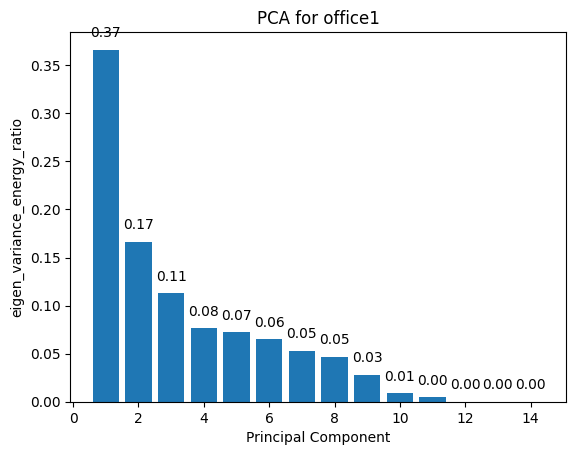

Eigen energy:  [0.37005511 0.16875801 0.1110377  0.07353362 0.07181161 0.06311141
 0.05136296 0.04748404 0.02956542 0.00896152 0.0043186  0.
 0.         0.        ]
Number of components that explain at least 70% of the variance: 4


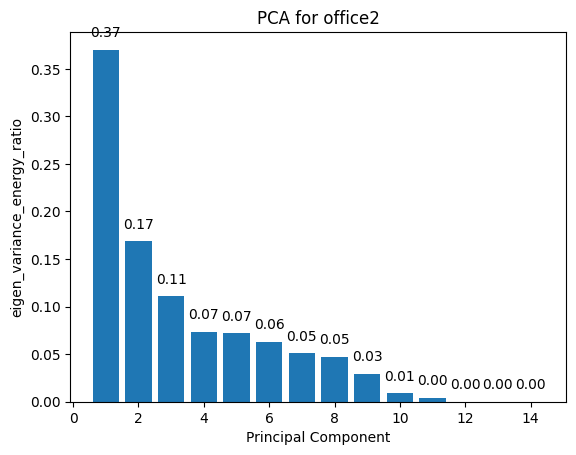

Eigen energy:  [0.37065945 0.1683588  0.10858    0.07556976 0.07164621 0.06315239
 0.05380766 0.04589424 0.02929669 0.00853123 0.00450358 0.
 0.         0.        ]
Number of components that explain at least 70% of the variance: 4


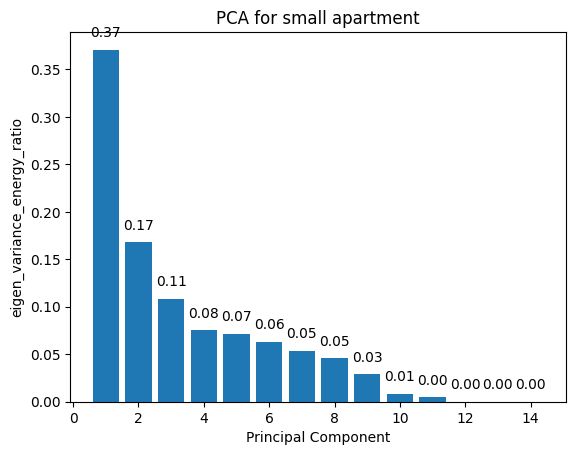

Eigen energy:  [0.36716382 0.16762291 0.11029371 0.07508834 0.07194406 0.06277454
 0.05375143 0.04750099 0.03030948 0.00902375 0.00452697 0.
 0.         0.        ]
Number of components that explain at least 70% of the variance: 4


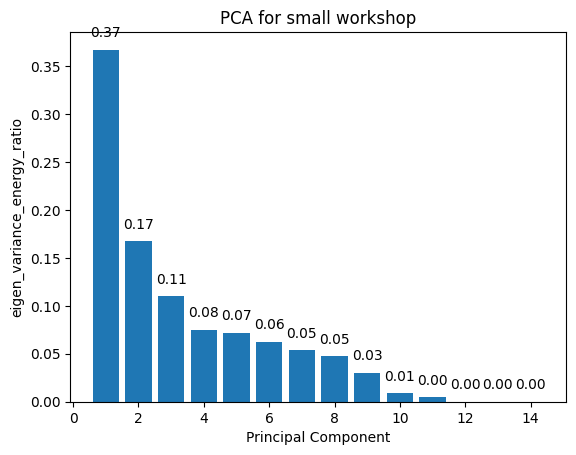

Eigen energy:  [0.37456579 0.16762391 0.11061908 0.07358965 0.07017677 0.06109576
 0.05172447 0.04693614 0.0303395  0.00887604 0.00445288 0.
 0.         0.        ]
Number of components that explain at least 70% of the variance: 4


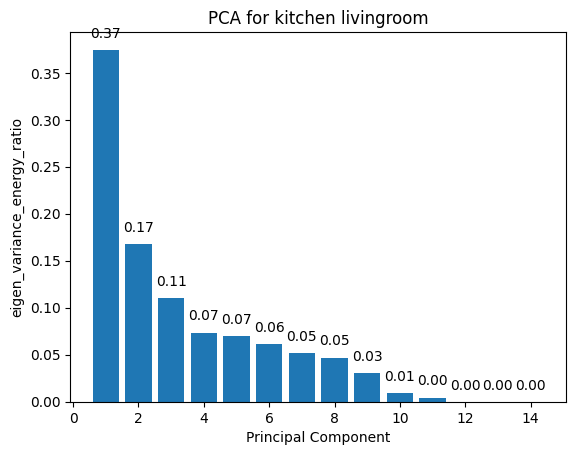

Eigen energy:  [0.36982163 0.16849842 0.11142027 0.07441354 0.07258344 0.06113158
 0.05223995 0.04685332 0.02973056 0.00899334 0.00431396 0.
 0.         0.        ]
Number of components that explain at least 70% of the variance: 4


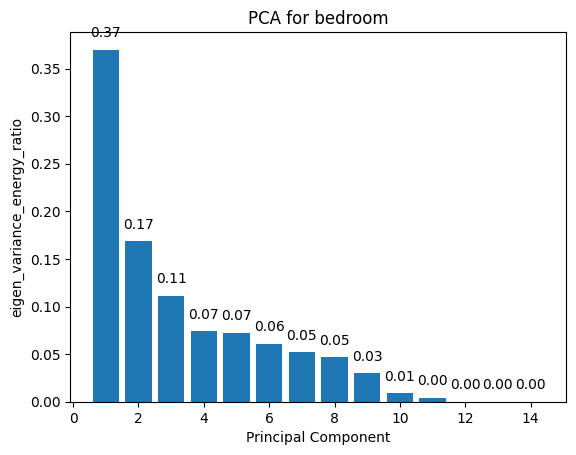

Eigen energy:  [0.37563133 0.16860747 0.11066017 0.07337202 0.07113937 0.06066953
 0.0516606  0.04604723 0.02946588 0.00843419 0.00431221 0.
 0.         0.        ]
Number of components that explain at least 70% of the variance: 4


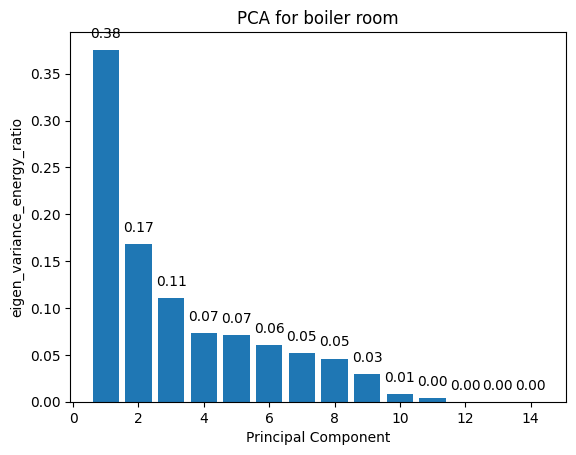

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(suppress=True)

# Apply PCA to each environment
for indx, environmentFeature in enumerate(environmentfeatures_List):
    X = environmentFeature[['RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC'
                            , 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR']]
    Y = environmentFeature[['NLOS']]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca_feature = PCA()
    pca_feature.fit(X_scaled)

    eigen_energy = pca_feature.explained_variance_ratio_
    print('Eigen energy: ', eigen_energy)

    # Calculate the cumulative sum of eigenenergy
    cum_eigen_energy = np.cumsum(eigen_energy)
    
    # Find the number of components that explain at least 80% of the variance
    n_components = np.where(cum_eigen_energy >= 0.7)[0][0] + 1
    print(f'Number of components that explain at least 70% of the variance: {n_components}')

    plt.bar(range(1, 15), eigen_energy, align='center')
    # Annotate the bars with the eigen energy values
    for i, v in enumerate(eigen_energy):
        plt.text(i + 1, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
    plt.xlabel('Principal Component')
    plt.ylabel('eigen_variance_energy_ratio')
    plt.title('PCA for ' + Environment[indx])
    plt.show()

After measuring the eigen energy of each number of Principle Component, the program returned that 4 PC is sufficient to measure 70% variance of each dataset feature(s) hence 4 Principle Components will be used.

<font color="red">Code: Selecting 4 PC(s) and storing each environment feature PCA to a dictionary</font>

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

environmentFeaturesPCA_List = {}

# Apply PCA and train a model for each environment
for indx, environmentFeature in enumerate(environmentfeatures_List):
    X = environmentFeature[['RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC'
                            , 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR']]
    Y = environmentFeature[['NLOS']]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA for 4 principal components
    pca = PCA(n_components=4)
    principalComponents = pca.fit_transform(X_scaled)
    principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])

    # Concatenate the principal components with the target variable
    finalDf = pd.concat([Y, principalDf], axis=1)

    # Store the PCA features for each environment
    environmentFeaturesPCA_List[Environment[indx]] = finalDf

    


#### Step 4: Analysing the CIR dataframes

<font color="red">Code: Analyse each environment CIR dataframes</font>

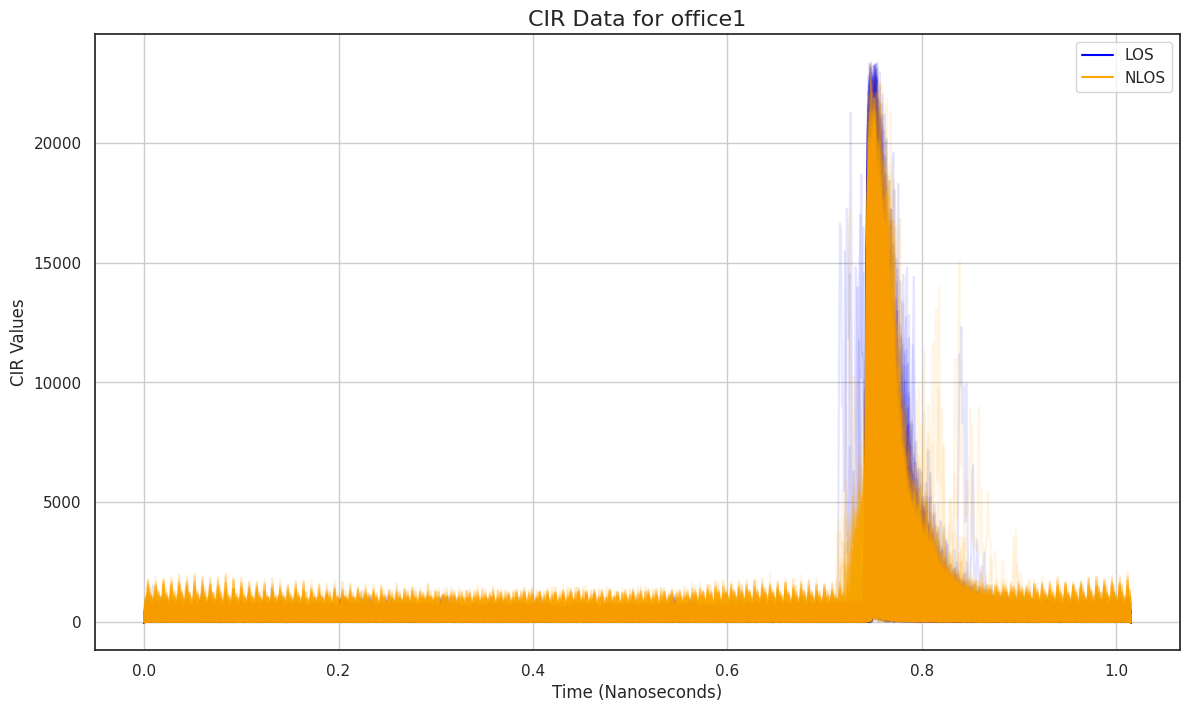

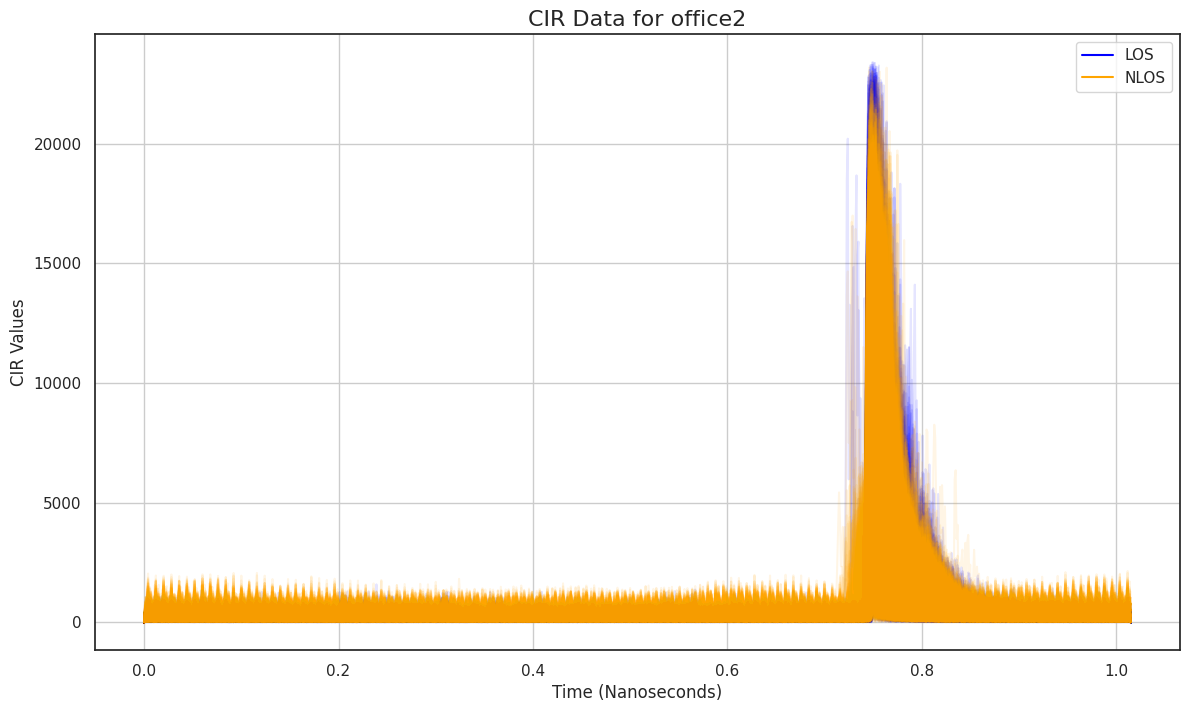

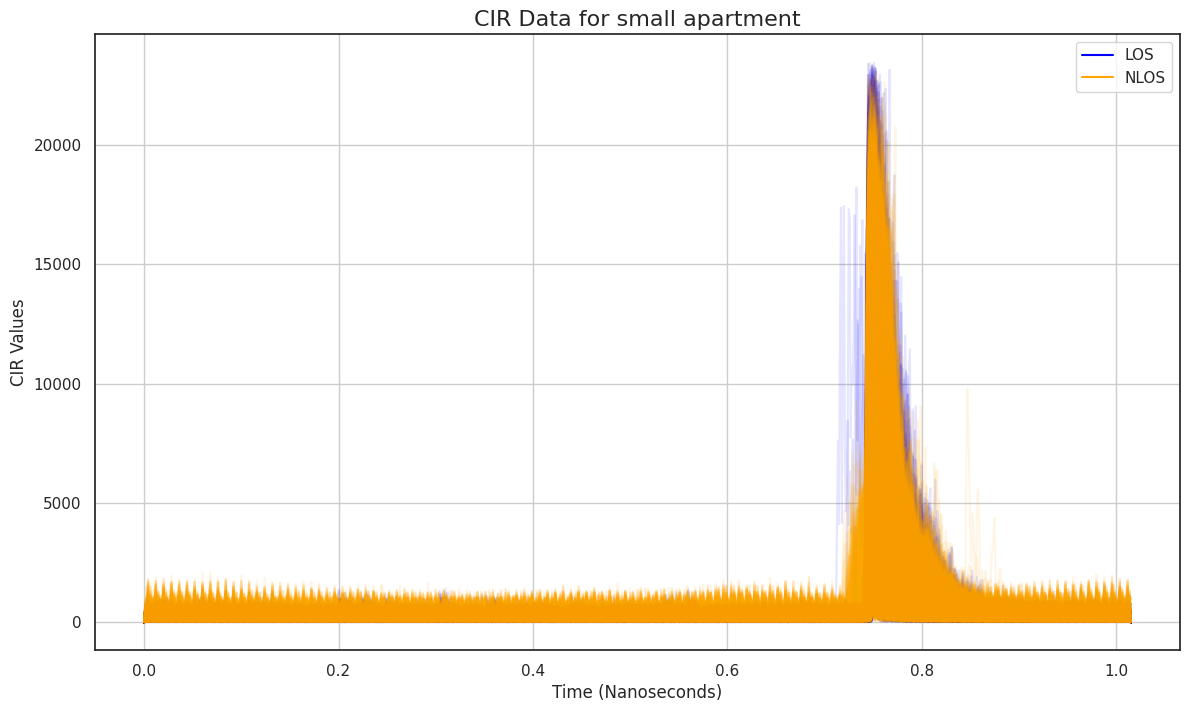

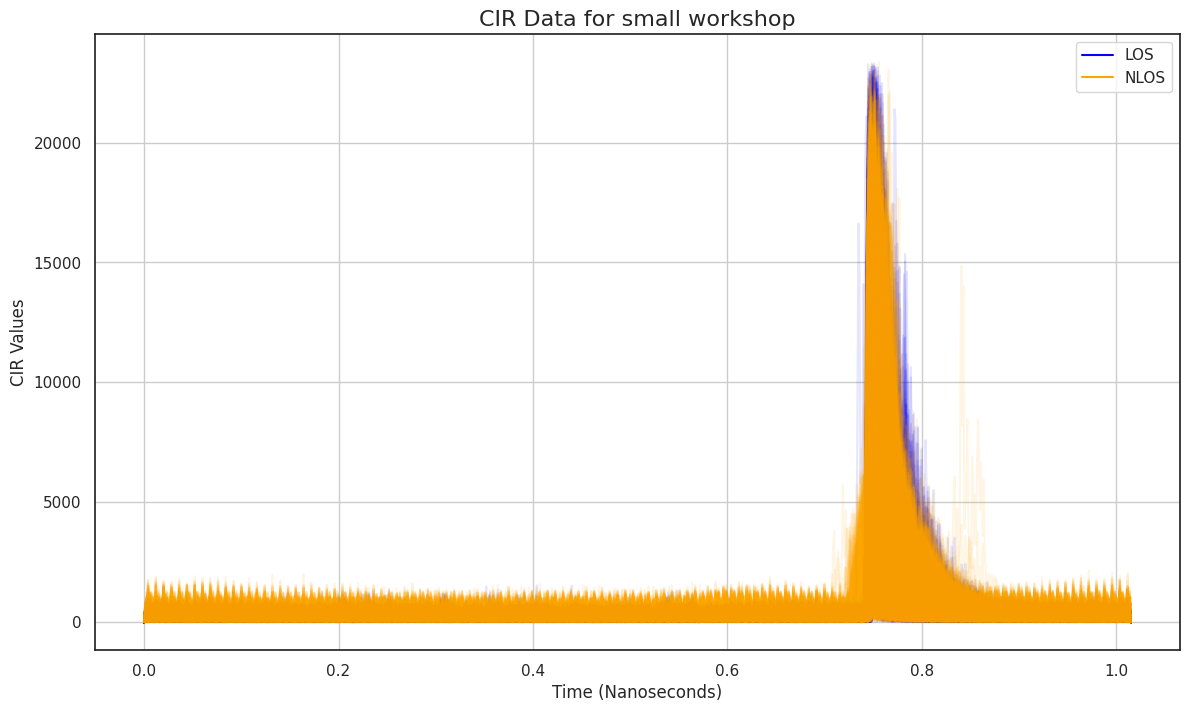

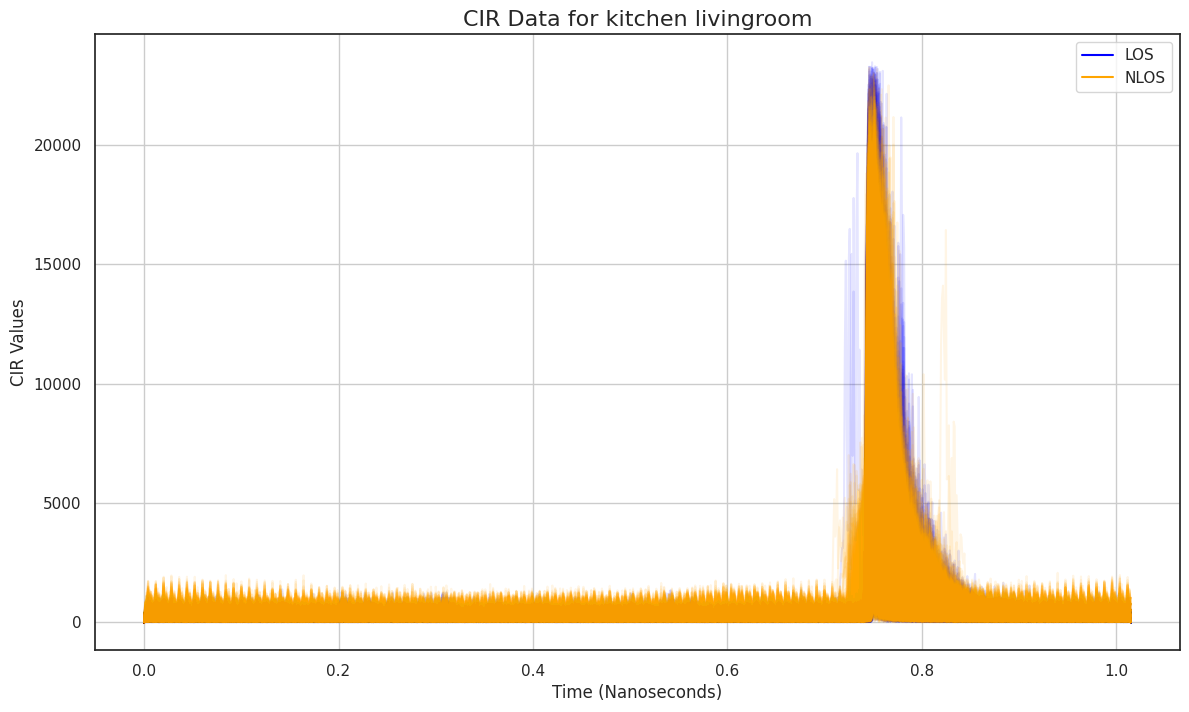

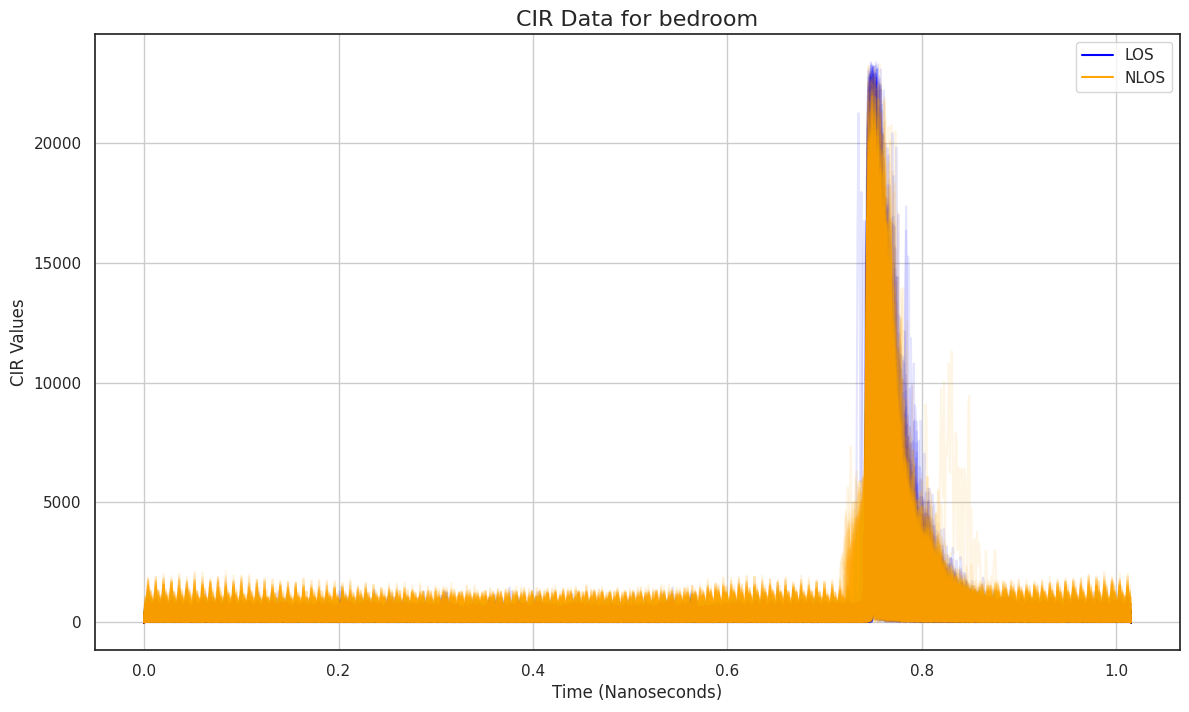

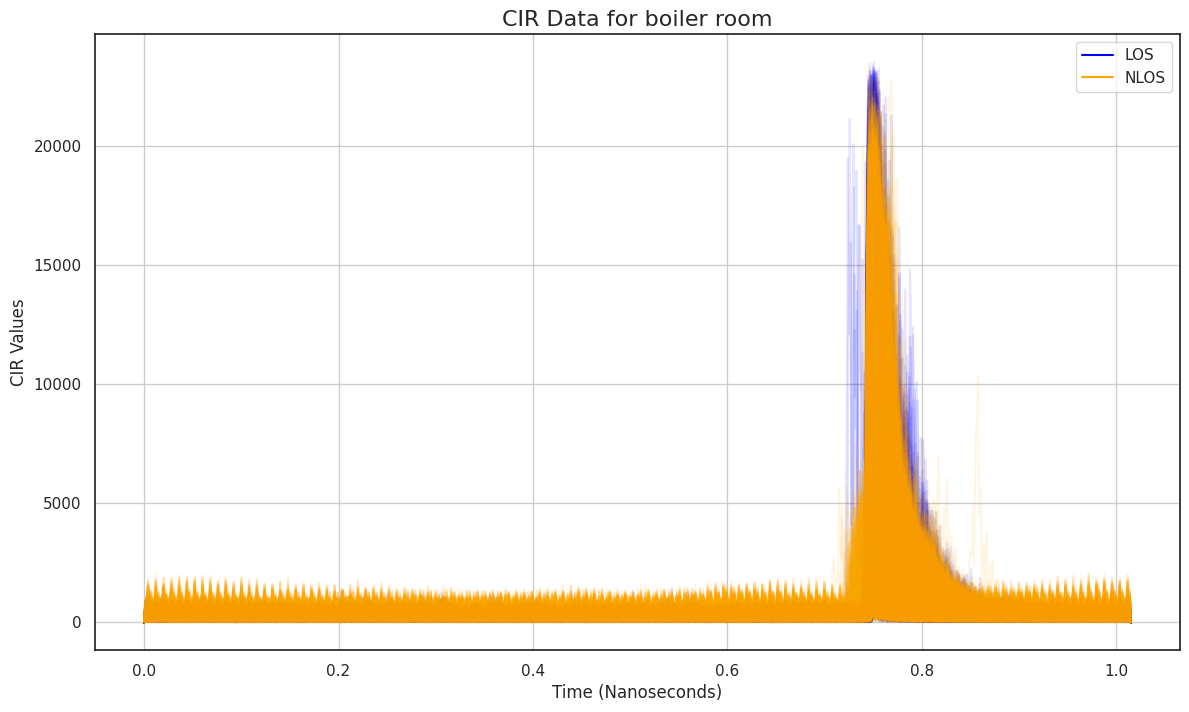

In [7]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

colors = ['blue', 'orange']  # Define colors for NLOS and LOS classes

# Plot data for each environment
for i, df in enumerate(environmentCIR_List):
    plt.figure(figsize=(14, 8))  # Create a single figure for all environments
    class_data = df[df['NLOS'] == 0]  # Filter data for NLOS = 0 (LOS)
    t = np.arange(len(class_data.iloc[0, :])) / 1000  # Create time array for nanoseconds
    for index, row in class_data.iterrows():
        plt.plot(t, row, linestyle='-', color=colors[0], alpha=0.1)  # Plot all records for LOS class

    class_data = df[df['NLOS'] == 1]  # Filter data for NLOS = 1 (NLOS)
    for index, row in class_data.iterrows():
        plt.plot(t, row, linestyle='-', color=colors[1], alpha=0.1)  # Plot all records for NLOS class

    # Add title, labels and legend
    plt.title('CIR Data for ' + Environment[i], fontsize=16)
    plt.xlabel('Time (Nanoseconds)', fontsize=12)
    plt.ylabel('CIR Values', fontsize=12)
    plt.grid(True)
    los_line = mlines.Line2D([], [], color=colors[0], label='LOS')
    nlos_line = mlines.Line2D([], [], color=colors[1], label='NLOS')
    plt.legend(handles=[los_line, nlos_line], loc='upper right')
    plt.show()

As observed from the 7 line charts, the important CIR information lies around CIR 700 to CIR 900. X-axis(Time) is represented by no. of CIR divided by 1000 to get the time unit in nanoseconds. As such, we will only require to retrive the iloc of 700 to 900 of CIR.

<font color="red">Code: Retrieving only the iloc of 700 to 900 of each environmentCIR dataframe</font>

In [9]:
sliced_environmentCIR_List = {}

# Slice each DataFrame in the list
for indx, environmentCIR in enumerate(environmentCIR_List):
    X = environmentCIR.drop('NLOS', axis=1)
    X = X.iloc[:, 700:901]
    sliced_df = X
    print(sliced_df)
    sliced_environmentCIR_List[Environment[indx]] = sliced_df

      CIR701  CIR702  CIR703  CIR704  CIR705  CIR706  CIR707  CIR708  CIR709  \
0      214.0   312.0   204.0   292.0   234.0   190.0   330.0   346.0   185.0   
1       96.0   472.0   184.0   235.0   207.0   104.0   124.0   230.0   222.0   
2      241.0   206.0   250.0   344.0   221.0   433.0   175.0   267.0   147.0   
3      133.0   482.0   488.0    97.0   249.0   232.0   169.0   220.0   249.0   
4      169.0   142.0   141.0    82.0   151.0   312.0   245.0   303.0   263.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5995   312.0   104.0   207.0   227.0   162.0   199.0   335.0   309.0   243.0   
5996   376.0   377.0   502.0    83.0   246.0   228.0   236.0   209.0   505.0   
5997   242.0    74.0   268.0   199.0   300.0   249.0   231.0   201.0   162.0   
5998    67.0   212.0   277.0   107.0   147.0   242.0   332.0   257.0   130.0   
5999   217.0   299.0   304.0   121.0   268.0    47.0   205.0   150.0   322.0   

      CIR710  ...  CIR892  CIR893  CIR8

i) Combine feature selected with the sliced CIR dataframe back together

<font color="red">Code: Combine selected features and CIR back together</font>

In [10]:
combined_environment_List1 = {}

index = 0
for features_df, CIR_df in zip(environmentfeatures_List, sliced_environmentCIR_List.values()):
    features_df = features_df.drop(['CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR'], axis=1)
    combined_df = pd.concat([features_df, CIR_df], axis=1)
    combined_environment_List1[Environment[index]] = combined_df
    index += 1

<font color="red">Code: Find and eliminate outliers</font>

In [ ]:
from scipy import stats
from scipy.stats import chi2
from scipy.spatial import distance

cleaned_environment_List1 = {}

# Define a function to remove outliers based on Z-score
def remove_outliers(df, threshold=3):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return df[filtered_entries]

for indx, environment in enumerate(combined_environment_List1.values()):
    print('Processing ' + Environment[indx] + ' environment')
    
    # Apply the function to your DataFrame
    cleaned_df = remove_outliers(environment.drop('NLOS', axis=1))

    # Merge cleaned DataFrame with NLOS column
    cleaned_combined_df = cleaned_df.merge(environment['NLOS'], left_index=True, right_index=True)

    # Optionally, you can check the shape of the cleaned DataFrame
    print("Original shape:", environment.shape)
    print("Cleaned shape:", cleaned_combined_df.shape)

    cleaned_environment_List1[Environment[indx]] = cleaned_combined_df




ii) Combine selected PC components with the sliced CIR dataframe back together

<font color="red">Code: Combine selected PC components and CIR back together</font>

In [14]:
combined_environment_List2 = {}

index = 0
for PCA_df, CIR_df in zip(environmentFeaturesPCA_List.values(), sliced_environmentCIR_List.values()):
    combined_df = pd.concat([PCA_df, CIR_df], axis=1)
    print(combined_df)
    combined_environment_List2[Environment[index]] = combined_df
    index += 1

      NLOS       PC1       PC2       PC3       PC4  CIR701  CIR702  CIR703  \
0      0.0 -0.783590 -0.667862 -0.363852 -0.221788   214.0   312.0   204.0   
1      0.0 -0.850622 -0.328436  0.737909  0.087020    96.0   472.0   184.0   
2      1.0  1.702437 -0.645078  1.050431  1.034177   241.0   206.0   250.0   
3      1.0  0.803275 -0.095045 -1.003875  0.991844   133.0   482.0   488.0   
4      0.0 -2.375404  0.396333  0.859414 -1.188818   169.0   142.0   141.0   
...    ...       ...       ...       ...       ...     ...     ...     ...   
5995   0.0 -0.843563 -1.084135 -0.310742  0.192607   312.0   104.0   207.0   
5996   1.0  4.029035 -0.491375 -1.408908 -1.674599   376.0   377.0   502.0   
5997   0.0 -2.712875  0.586554 -0.471751 -0.659878   242.0    74.0   268.0   
5998   1.0 -1.046270 -1.043641  1.420854  0.915656    67.0   212.0   277.0   
5999   0.0 -2.660716  1.688324 -0.615994  0.659497   217.0   299.0   304.0   

      CIR704  CIR705  ...  CIR892  CIR893  CIR894  CIR895  CIR8

<font color="red">Code: Find and eliminate outliers</font>

In [15]:
from scipy import stats

cleaned_environment_List2 = {}

# Define a function to remove outliers based on Z-score
def remove_outliers(df, threshold=3):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return df[filtered_entries]

for indx, environment in enumerate(combined_environment_List2.values()):
    print('Processing ' + Environment[indx] + ' environment')
    
    # Apply the function to your DataFrame
    cleaned_df = remove_outliers(environment.drop('NLOS', axis=1))

    # Merge cleaned DataFrame with NLOS column
    cleaned_combined_df = cleaned_df.merge(environment['NLOS'], left_index=True, right_index=True)

    # Optionally, you can check the shape of the cleaned DataFrame
    print("Original shape:", environment.shape)
    print("Cleaned shape:", cleaned_combined_df.shape)

    print()

    cleaned_environment_List2[Environment[indx]] = cleaned_combined_df

Processing office1 environment
Original shape: (6000, 206)
Cleaned shape: (3485, 206)

Processing office2 environment
Original shape: (6000, 206)
Cleaned shape: (3496, 206)

Processing small apartment environment
Original shape: (6000, 206)
Cleaned shape: (3492, 206)

Processing small workshop environment
Original shape: (6000, 206)
Cleaned shape: (3438, 206)

Processing kitchen livingroom environment
Original shape: (6000, 206)
Cleaned shape: (3480, 206)

Processing bedroom environment
Original shape: (6000, 206)
Cleaned shape: (3455, 206)

Processing boiler room environment
Original shape: (6000, 206)
Cleaned shape: (3453, 206)



In [16]:
cleaned_environment_List1 # cleaned_environment containing the features and CIR data for each environment
cleaned_environment_List2 # cleaned_environment containing the PCA features and CIR data for each environment

print(cleaned_environment_List2['office1'])


           PC1       PC2       PC3       PC4  CIR701  CIR702  CIR703  CIR704  \
0    -0.783590 -0.667862 -0.363852 -0.221788   214.0   312.0   204.0   292.0   
1    -0.850622 -0.328436  0.737909  0.087020    96.0   472.0   184.0   235.0   
2     1.702437 -0.645078  1.050431  1.034177   241.0   206.0   250.0   344.0   
3     0.803275 -0.095045 -1.003875  0.991844   133.0   482.0   488.0    97.0   
4    -2.375404  0.396333  0.859414 -1.188818   169.0   142.0   141.0    82.0   
...        ...       ...       ...       ...     ...     ...     ...     ...   
5994  0.099257  1.234681 -0.768542  0.426919   288.0   672.0   492.0   228.0   
5995 -0.843563 -1.084135 -0.310742  0.192607   312.0   104.0   207.0   227.0   
5997 -2.712875  0.586554 -0.471751 -0.659878   242.0    74.0   268.0   199.0   
5998 -1.046270 -1.043641  1.420854  0.915656    67.0   212.0   277.0   107.0   
5999 -2.660716  1.688324 -0.615994  0.659497   217.0   299.0   304.0   121.0   

      CIR705  CIR706  ...  CIR893  CIR8

In [14]:
import os
import pandas as pd
Environment = ['office1', 'office2', 'small apartment', 'small workshop', 'kitchen livingroom', 'bedroom', 'boiler room']
os.makedirs('processed', exist_ok=True)
for env in Environment:
    df = cleaned_environment_List2[env]
    file_name = f'../processed/{env}_PCA.csv'
    df.to_csv(file_name, index=False)

## Data Mining

### Algorithm test

[0.8185745140388769, 0.8185745140388769, 0.8267338612910967, 0.8336933045356372, 0.8466522678185745, 0.8816894648428125, 0.9186465082793377, 0.9757619390448764, 0.9887209023278137]
[0.8071017274472169, 0.8071017274472169, 0.8109404990403071, 0.8071017274472169, 0.8013435700575816, 0.7936660268714012, 0.7754318618042226, 0.7408829174664108, 0.7418426103646834]


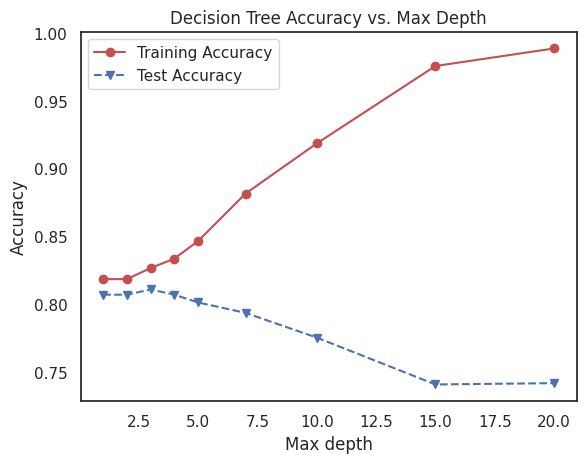

In [21]:
# Test Decision Tree with max depths parameter
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define the list of max depths to evaluate
max_depths = [1, 2, 3, 4, 5, 7, 10, 15, 20]

# Get the data frame for 'office1' environment from cleaned_environment_List2
pcadf = cleaned_environment_List2['office1']

# Split data into features and target for PCA
X_pca = pcadf.drop('NLOS', axis=1)
y_pca = pcadf['NLOS']
# Split data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Initialize lists to store training and testing accuracies
trainAcc = []
testAcc = []

# Loop through each max depth value
for k in max_depths:
    # Initialize Decision Tree classifier with current max depth
    clf1 = DecisionTreeClassifier(max_depth=k)
    # Train the classifier on training data
    clf1.fit(X_train_pca, y_train_pca)
    # Predictions on training and testing sets
    Y_predTrain = clf1.predict(X_train_pca)
    Y_predTest = clf1.predict(X_test_pca)
    # Calculate and store training and testing accuracies
    trainAcc.append(accuracy_score(y_train_pca, Y_predTrain))
    testAcc.append(accuracy_score(y_test_pca, Y_predTest))

# Print the training and testing accuracies
print(trainAcc)
print(testAcc)
# Plotting the accuracies against max depth
plt.plot(max_depths, trainAcc, 'ro-', max_depths, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.show()

[1.0, 0.8581713462922966, 0.832013438924886, 0.8226541876649868, 0.8116150707943365, 0.8039356851451884, 0.7984161267098632, 0.7955363570914327, 0.7902567794576434, 0.7916966642668587]
[0.7092130518234165, 0.7226487523992322, 0.7610364683301344, 0.7581573896353166, 0.763915547024952, 0.7735124760076776, 0.7773512476007678, 0.7763915547024952, 0.7696737044145874, 0.7658349328214972]


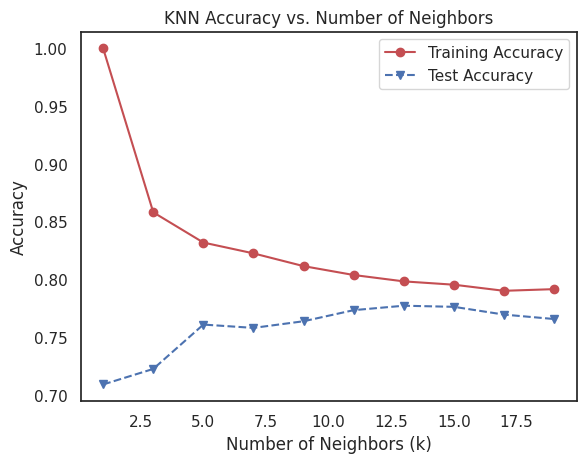

In [18]:
# Test KNN with nearest neighbours parameter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

pcadf = cleaned_environment_List2['office1']

X_pca = pcadf.drop('NLOS', axis=1)
y_pca = pcadf['NLOS']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

train_acc = []
test_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train_pca)
    y_pred_train = knn.predict(X_train_pca)
    y_pred_test = knn.predict(X_test_pca)
    train_acc.append(accuracy_score(y_train_pca, y_pred_train))
    test_acc.append(accuracy_score(y_test_pca, y_pred_test))

print(train_acc)
print(test_acc)

plt.plot(k_values, train_acc, 'ro-', label='Training Accuracy')
plt.plot(k_values, test_acc, 'bv--', label='Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.show()

[0.7780177585793137, 0.8197744180465563, 0.8912886969042476, 0.9793616510679146, 1.0]
[0.7677543186180422, 0.7802303262955854, 0.789827255278311, 0.7735124760076776, 0.7562380038387716]


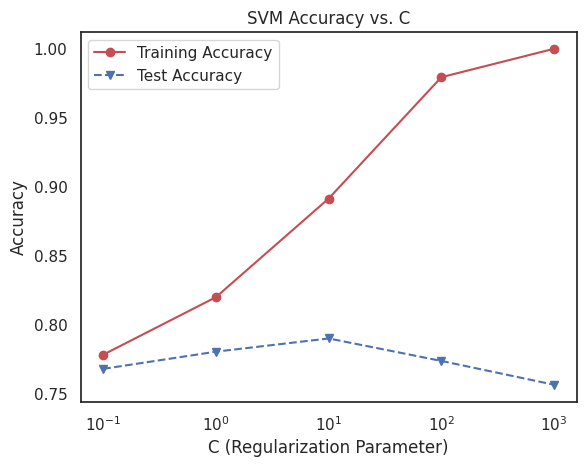

In [20]:
# Test SVM with C parameter
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

pcadf = cleaned_environment_List2['office1']

X_pca = pcadf.drop('NLOS', axis=1)
y_pca = pcadf['NLOS']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

C_values = [0.1, 1, 10, 100, 1000]

train_acc = []
test_acc = []

for C in C_values:
    svm = SVC(C=C)
    svm.fit(X_train_pca, y_train_pca)
    y_pred_train = svm.predict(X_train_pca)
    y_pred_test = svm.predict(X_test_pca)
    train_acc.append(accuracy_score(y_train_pca, y_pred_train))
    test_acc.append(accuracy_score(y_test_pca, y_pred_test))

print(train_acc)
print(test_acc)

plt.plot(C_values, train_acc, 'ro-', label='Training Accuracy')
plt.plot(C_values, test_acc, 'bv--', label='Test Accuracy')
plt.legend()
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. C')
plt.xscale('log')
plt.show()


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.8253358925143954, 0.8387715930902111, 0.8272552783109405, 0.8282149712092131, 0.8301343570057581, 0.8272552783109405]


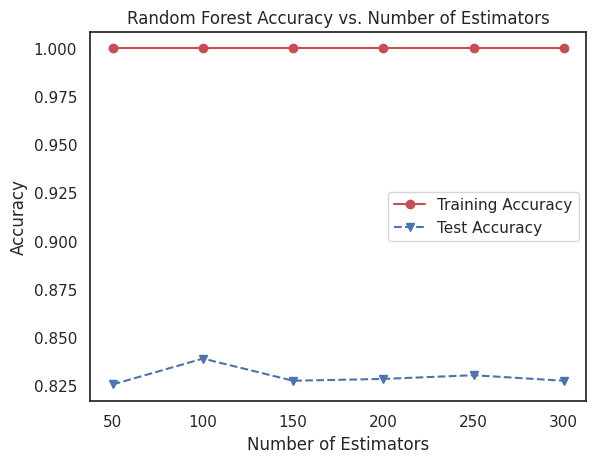

In [22]:
# Test Random Forest with n estimators parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

pcadf = cleaned_environment_List2['office1']

X_pca = pcadf.drop('NLOS', axis=1)
y_pca = pcadf['NLOS']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

n_estimators_values = [50, 100, 150, 200, 250, 300]

train_acc = []
test_acc = []

for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(X_train_pca, y_train_pca)
    y_pred_train = rf.predict(X_train_pca)
    y_pred_test = rf.predict(X_test_pca)
    train_acc.append(accuracy_score(y_train_pca, y_pred_train))
    test_acc.append(accuracy_score(y_test_pca, y_pred_test))

print(train_acc)
print(test_acc)

plt.plot(n_estimators_values, train_acc, 'ro-', label='Training Accuracy')
plt.plot(n_estimators_values, test_acc, 'bv--', label='Test Accuracy')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.show()


[0.8370530357571394, 0.8876889848812095, 0.990160787137029, 0.9990400767938565, 0.5598752099832014]
[0.8195777351247601, 0.8310940499040307, 0.8262955854126679, 0.7792706333973128, 0.5710172744721689]


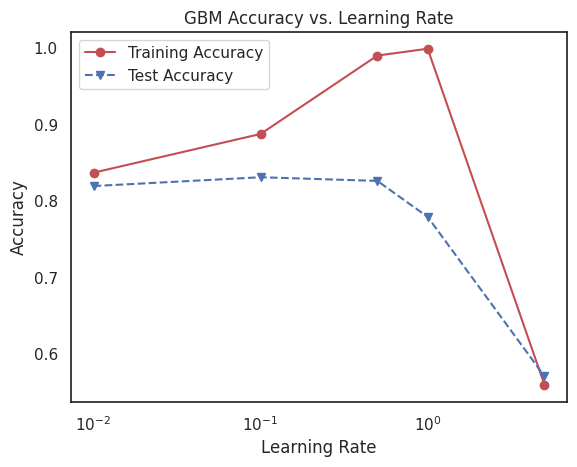

In [24]:
# Test GBM with learning rates parameter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

pcadf = cleaned_environment_List2['office1']

X_pca = pcadf.drop('NLOS', axis=1)
y_pca = pcadf['NLOS']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

learning_rates = [0.01, 0.1, 0.5, 1, 5]

train_acc = []
test_acc = []

for lr in learning_rates:
    gbm = GradientBoostingClassifier(learning_rate=lr, n_estimators=100)  # Keeping n_estimators constant
    gbm.fit(X_train_pca, y_train_pca)
    y_pred_train = gbm.predict(X_train_pca)
    y_pred_test = gbm.predict(X_test_pca)
    train_acc.append(accuracy_score(y_train_pca, y_pred_train))
    test_acc.append(accuracy_score(y_test_pca, y_pred_test))

print(train_acc)
print(test_acc)

plt.plot(learning_rates, train_acc, 'ro-', label='Training Accuracy')
plt.plot(learning_rates, test_acc, 'bv--', label='Test Accuracy')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('GBM Accuracy vs. Learning Rate')
plt.xscale('log')
plt.show()


### Chosen model

1. Decision Tree:

    Training Accuracy:
        Ranges from 0.818 to 0.989
    Test Accuracy:
        Ranges from 0.741 to 0.807

2. K-Nearest Neighbors (KNN):

    Training Accuracy:
        Perfect training accuracy at 1.0 for k=1
        Decreases with increasing k, indicating potential overfitting at lower k values
    Test Accuracy:
        Ranges from 0.709 to 0.774, improving with higher k values

3. Support Vector Machine (SVM):

    Training Accuracy:
        Increases with higher regularization (C) values, reaching perfect accuracy at C=1.0
    Test Accuracy:
        Ranges from 0.757 to 0.789, indicating decent generalization performance

4. Random Forest:

    Training Accuracy:
        Perfect training accuracy at 1.0 for all cases
    Test Accuracy:
        Ranges from 0.825 to 0.838, indicating good generalization performance

5. Gradient Boosting Machine (GBM):

    Training Accuracy:
        Varies from 0.559 to 0.999, indicating potential sensitivity to hyperparameters
    Test Accuracy:
        Ranges from 0.571 to 0.831, with varying performance based on hyperparameters

Conclusion:

    Decision Tree: Provides moderate performance but may suffer from overfitting.
    KNN: Achieves high training accuracy but requires careful selection of k to avoid overfitting.
    SVM: Shows consistent performance with decent generalization.
    Random Forest: Demonstrates excellent generalization with high accuracy.
    GBM: While potentially powerful, requires thorough hyperparameter tuning and regularization.

Based on the results and considering factors such as simplicity, generalization performance, and ease of use, we dicde to use random forest with 100 n_estimators. Random Forest offers robustness, good generalization, and does not require extensive hyperparameter tuning compared to GBM.

### Train/test split test

Test Size 7:3 - Test Accuracy: [0.8445297504798465, 0.8402822322001283, 0.8530166880616175, 0.8330122029543995, 0.8293929712460064, 0.8213367609254498, 0.8430121250797703]
Test Size 8:2 - Test Accuracy: [0.8320537428023033, 0.8354186717998076, 0.8537054860442733, 0.8236994219653179, 0.8274209012464045, 0.8217726396917149, 0.8210526315789474]


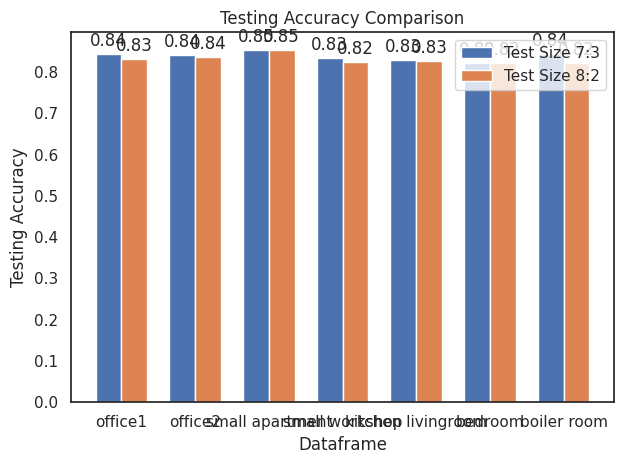

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store training and testing accuracies for different test sizes
training_accuracies_7_3 = []
training_accuracies_8_2 = []
testing_accuracies_7_3 = []
testing_accuracies_8_2 = []

# Loop through each environment in Environment
for df_name in Environment:
    # Get the data frame for the current environment from cleaned_environment_List2
    pcadf = cleaned_environment_List2[df_name]
    X_pca = pcadf.drop('NLOS', axis=1)
    y_pca = pcadf['NLOS']

    # Split data into training and testing sets for test sizes 7:3 and 8:2
    X_train_pca_7_3, X_test_pca_7_3, y_train_pca_7_3, y_test_pca_7_3 = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)
    X_train_pca_8_2, X_test_pca_8_2, y_train_pca_8_2, y_test_pca_8_2 = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

    # Train Random Forest classifiers for test sizes 7:3 and 8:2
    rf_7_3 = RandomForestClassifier(n_estimators=100)
    rf_7_3.fit(X_train_pca_7_3, y_train_pca_7_3)
    rf_8_2 = RandomForestClassifier(n_estimators=100)
    rf_8_2.fit(X_train_pca_8_2, y_train_pca_8_2)

    # Predictions on training and testing sets for both test sizes
    y_pred_train_7_3 = rf_7_3.predict(X_train_pca_7_3)
    y_pred_test_7_3 = rf_7_3.predict(X_test_pca_7_3)
    y_pred_train_8_2 = rf_8_2.predict(X_train_pca_8_2)
    y_pred_test_8_2 = rf_8_2.predict(X_test_pca_8_2)

    # Calculate training and testing accuracies for both test sizes
    train_acc_7_3 = accuracy_score(y_train_pca_7_3, y_pred_train_7_3)
    test_acc_7_3 = accuracy_score(y_test_pca_7_3, y_pred_test_7_3)
    train_acc_8_2 = accuracy_score(y_train_pca_8_2, y_pred_train_8_2)
    test_acc_8_2 = accuracy_score(y_test_pca_8_2, y_pred_test_8_2)

    # Append accuracies to respective lists
    training_accuracies_7_3.append(train_acc_7_3)
    testing_accuracies_7_3.append(test_acc_7_3)
    training_accuracies_8_2.append(train_acc_8_2)
    testing_accuracies_8_2.append(test_acc_8_2)

# Print testing accuracies for test sizes 7:3 and 8:2
print(f"Test Size 7:3 - Test Accuracy: {testing_accuracies_7_3}")
print(f"Test Size 8:2 - Test Accuracy: {testing_accuracies_8_2}")

# Plot the comparison of testing accuracies for both test sizes
x = np.arange(len(Environment))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, testing_accuracies_7_3, width, label='Test Size 7:3')
bars2 = ax.bar(x + width/2, testing_accuracies_8_2, width, label='Test Size 8:2')

# Set plot labels, title, ticks, and legend
ax.set_xlabel('Dataframe')
ax.set_ylabel('Testing Accuracy')
ax.set_title('Testing Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(Environment)
ax.legend()

# Function to add labels to bars in the plot
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the add_labels function for both sets of bars
add_labels(bars1)
add_labels(bars2)

# Adjust layout and display the plot
fig.tight_layout()
plt.show()


After analyzing the testing accuracies for both test size splits, it can be observed that:

    Test Size 7:3 shows an average testing accuracy of approximately 0.839 across all dataframes.
    Test Size 8:2 shows an average testing accuracy of approximately 0.830 across all dataframes.

Based on the higher average testing accuracy observed, the 7:3 split is recommended for training and testing the Random Forest classifier on the given dataframes. This split size generally leads to better model performance in terms of testing accuracy.

### Confusion matrix
table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm, particularly in terms of the types of errors made.

A confusion matrix has rows and columns that represent the actual and predicted class labels, respectively. The four main terms in a confusion matrix are:

- True Positives (TP): These are the cases where the model predicted the positive class correctly.
- True Negatives (TN): These are the cases where the model predicted the negative class correctly.
- False Positives (FP): These are the cases where the model predicted the positive class incorrectly (it should have been negative).
- False Negatives (FN): These are the cases where the model predicted the negative class incorrectly (it should have been positive).

[[TP  FP]

 [FN  TN]]

### Classification Report
summary of the precision, recall, F1 score, and support (the number of true instances for each class) for each class in a classification problem. It provides a comprehensive view of the model's performance across different classes.

### Precision
measures the accuracy of the positive predictions made by the model. It is calculated as the ratio of true positive predictions to the total number of positive predictions made by the model. High precision indicates that the model is good at avoiding false positives.

### Recall
measures the ability of the model to correctly identify all relevant instances (true positives) from the total actual positives. It is also known as sensitivity or true positive rate (TPR). High recall indicates that the model is good at avoiding false negatives.

### F1 Score
harmonic mean of precision and recall. It provides a balanced measure of the model's performance, especially when dealing with imbalanced datasets. F1 score is useful when both precision and recall are equally important.
The harmonic mean gives more weight to smaller numbers in the dataset. This means that if there are extreme outliers or very large values in the data, the harmonic mean will be less affected by them compared to the arithmetic mean.
This means a perfect model will have a F1 score of 1 – all of the predictions were correct.

### Cohen's kappa (k)
a statistic that measures the inter-rater agreement or reliability for categorical items when there are two or more raters. It is particularly useful when dealing with binary classification problems. Cohen's kappa considers the agreement between two raters beyond what would be expected by chance alone.

Cohen suggested the Kappa result be interpreted as follows: 
- ≤ 0 as indicating no agreement 
- 0.01–0.20 as none to slight
- 0.21–0.40 as fair 
- 0.41– 0.60 as moderate 
- 0.61–0.80 as substantial 
- 0.81–1.00 as almost perfect agreement

### Cross Validation (may not be needed)

Perform cross-validation to ensure the robustness of models. This involves splitting the dataset into training and validation sets multiple times to assess how well the model generalizes to unseen data.

Higher cross-validation scores indicate better model performance

### ROC

the ROC curve and AUC help evaluate how well model generalizes to different datasets (All Data vs. PCA Data) and how effectively it can classify LOS and NLOS instances regardless of the dimensionality of the input data.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, roc_auc_score
import numpy as np

# Initialize an empty list to store results
results_list = []

# Loop through each environment in Environment
for df_name in Environment:
    # Get the data frames for 'All' and 'PCA' types for the current environment
    alldf = cleaned_environment_List1[df_name]
    pcadf = cleaned_environment_List2[df_name]
    
    # Split data into features and target for 'All' type
    X_all = alldf.drop('NLOS', axis=1)
    y_all = alldf['NLOS']
    X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)
    
    # Train Random Forest classifier for 'All' type
    rf_classifier_all = RandomForestClassifier(n_estimators=100)
    rf_classifier_all.fit(X_train_all, y_train_all)
    y_all_pred = rf_classifier_all.predict(X_test_all)

    # Calculate evaluation metrics for 'All' type
    accuracy_all = accuracy_score(y_test_all, y_all_pred)
    conf_matrix_all = confusion_matrix(y_test_all, y_all_pred)
    precision_all = precision_score(y_test_all, y_all_pred)
    recall_all = recall_score(y_test_all, y_all_pred)
    f1_all = f1_score(y_test_all, y_all_pred)
    kappa_all = cohen_kappa_score(y_test_all, y_all_pred)
    fpr_all, tpr_all, _ = roc_curve(y_test_all, rf_classifier_all.predict_proba(X_test_all)[:, 1])
    auc_all = roc_auc_score(y_test_all, rf_classifier_all.predict_proba(X_test_all)[:, 1])
    
    # Split data into features and target for 'PCA' type
    X_pca = pcadf.drop('NLOS', axis=1)
    y_pca = pcadf['NLOS']
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)
    
    # Train Random Forest classifier for 'PCA' type
    rf_classifier_pca = RandomForestClassifier(n_estimators=100)
    rf_classifier_pca.fit(X_train_pca, y_train_pca)
    y_pca_pred = rf_classifier_pca.predict(X_test_pca)

    # Calculate evaluation metrics for 'PCA' type
    accuracy_pca = accuracy_score(y_test_pca, y_pca_pred)
    conf_matrix_pca = confusion_matrix(y_test_pca, y_pca_pred)
    precision_pca = precision_score(y_test_pca, y_pca_pred)
    recall_pca = recall_score(y_test_pca, y_pca_pred)
    f1_pca = f1_score(y_test_pca, y_pca_pred)
    kappa_pca = cohen_kappa_score(y_test_pca, y_pca_pred)
    fpr_pca, tpr_pca, _ = roc_curve(y_test_pca, rf_classifier_pca.predict_proba(X_test_pca)[:, 1])
    auc_pca = roc_auc_score(y_test_pca, rf_classifier_pca.predict_proba(X_test_pca)[:, 1])
    
    # Store results for 'All' and 'PCA' types in results_list
    results_all = {
        'location': df_name,
        'type': 'All',
        'accuracy': accuracy_all,
        'confusion_matrix': conf_matrix_all,
        'precision': precision_all,
        'recall': recall_all,
        'f1': f1_all,
        "kappa": kappa_all,
        'fpr': fpr_all,
        'tpr': tpr_all,
        'auc': auc_all
    }
    
    results_pca = {
        'location': df_name,
        'type': 'PCA',
        'accuracy': accuracy_pca,
        'confusion_matrix': conf_matrix_pca,
        'precision': precision_pca,
        'recall': recall_pca,
        'f1': f1_pca,
        "kappa": kappa_pca,
        'fpr': fpr_pca,
        'tpr': tpr_pca,
        'auc': auc_pca
    }
    
    results_list.append(results_all)
    results_list.append(results_pca)

# Loop through results_list and print evaluation metrics for each result
for result in results_list:
    print('=====================================')
    print(f'Location: {result["location"]}')
    print(f'Type: {result["type"]}')
    print(f'Accuracy: {result["accuracy"]}')
    print(f'Confusion Matrix: {result["confusion_matrix"]}')
    print(f'Precision: {result["precision"]}')
    print(f'Recall: {result["recall"]}')
    print(f'Accuracy: {result["accuracy"]}')
    print(f'F1 Score: {result["f1"]}')
    print(f'Cohen Kappa: {result["kappa"]}')
    print(f'Accuracy: {result["accuracy"]}')
    print(f'Area Under Curve: {result["auc"]}')


Location: office1
Type: All
Accuracy: 0.8413001912045889
Confusion Matrix: [[561  36]
 [130 319]]
Precision: 0.8985915492957747
Recall: 0.7104677060133631
Accuracy: 0.8413001912045889
F1 Score: 0.7935323383084577
Cohen Kappa: 0.6674875620937812
Accuracy: 0.8413001912045889
Area Under Curve: 0.908447210066666
Location: office1
Type: PCA
Accuracy: 0.8458093410108766
Confusion Matrix: [[807  64]
 [177 515]]
Precision: 0.8894645941278065
Recall: 0.7442196531791907
Accuracy: 0.8458093410108766
F1 Score: 0.8103855232100708
Cohen Kappa: 0.6821876131102893
Accuracy: 0.8458093410108766
Area Under Curve: 0.8818230988233577
Location: office2
Type: All
Accuracy: 0.8133333333333334
Confusion Matrix: [[543  36]
 [160 311]]
Precision: 0.8962536023054755
Recall: 0.6602972399150743
Accuracy: 0.8133333333333334
F1 Score: 0.7603911980440098
Cohen Kappa: 0.6131767996300932
Accuracy: 0.8133333333333334
Area Under Curve: 0.8729378201672845
Location: office2
Type: PCA
Accuracy: 0.8319435535599743
Confusion M

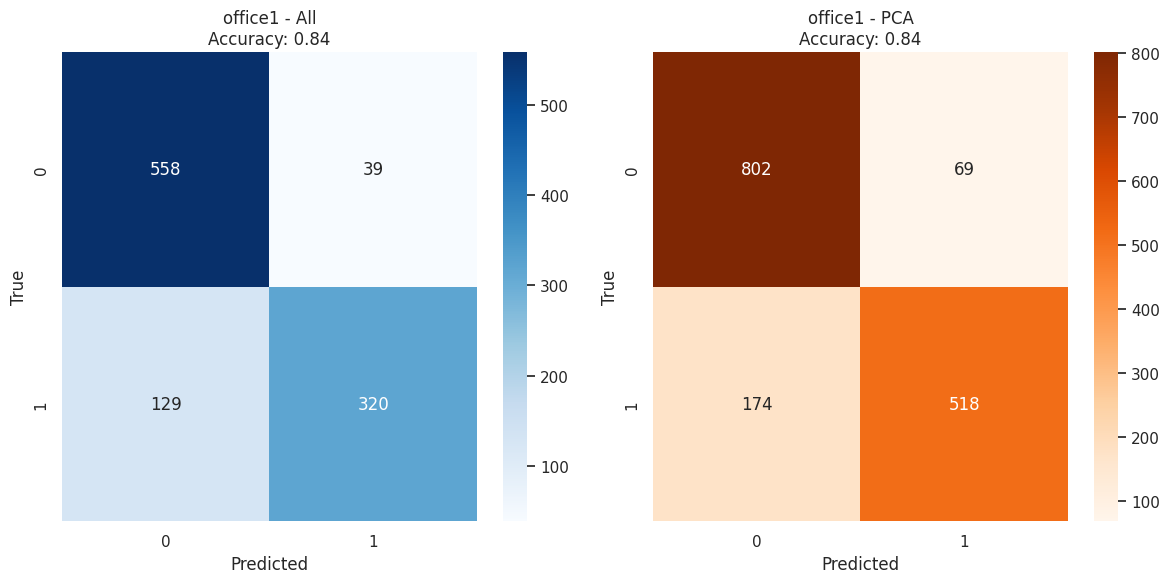

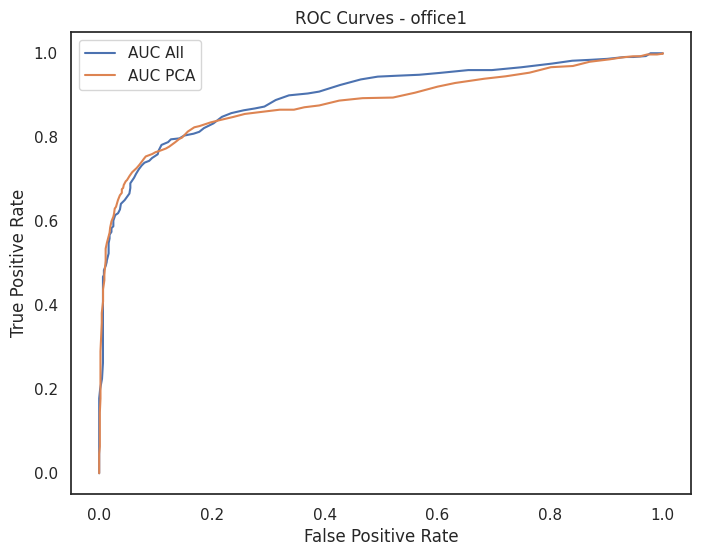

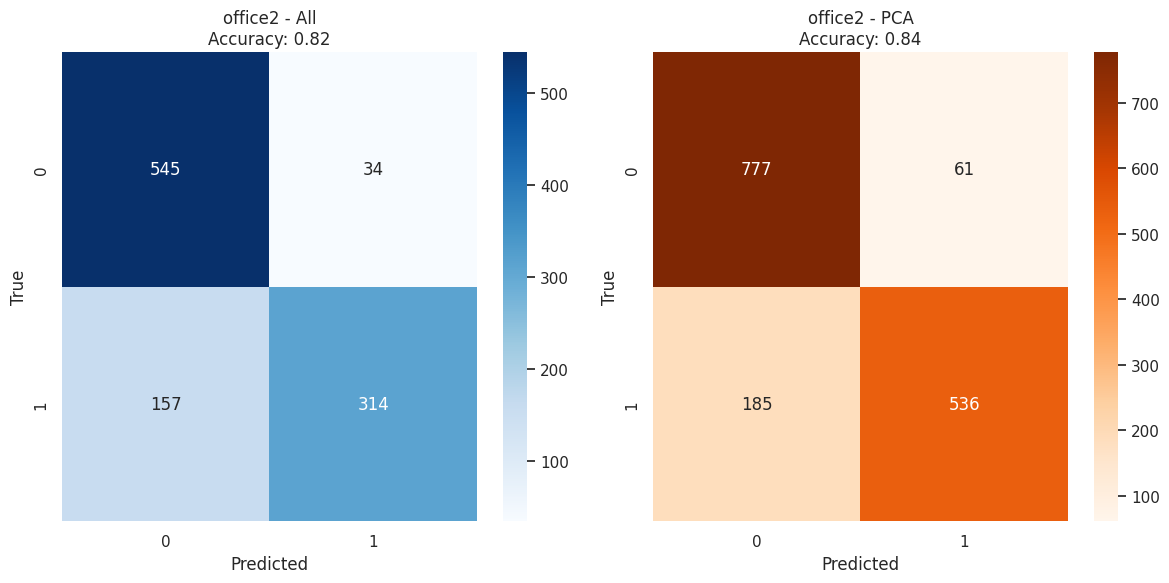

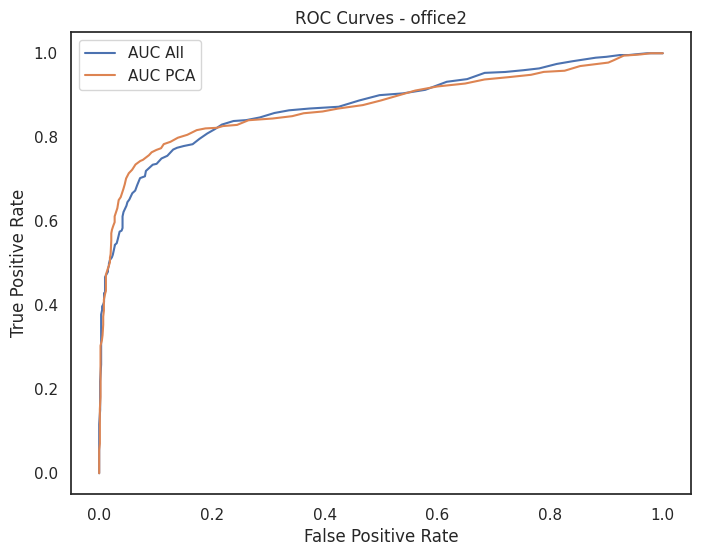

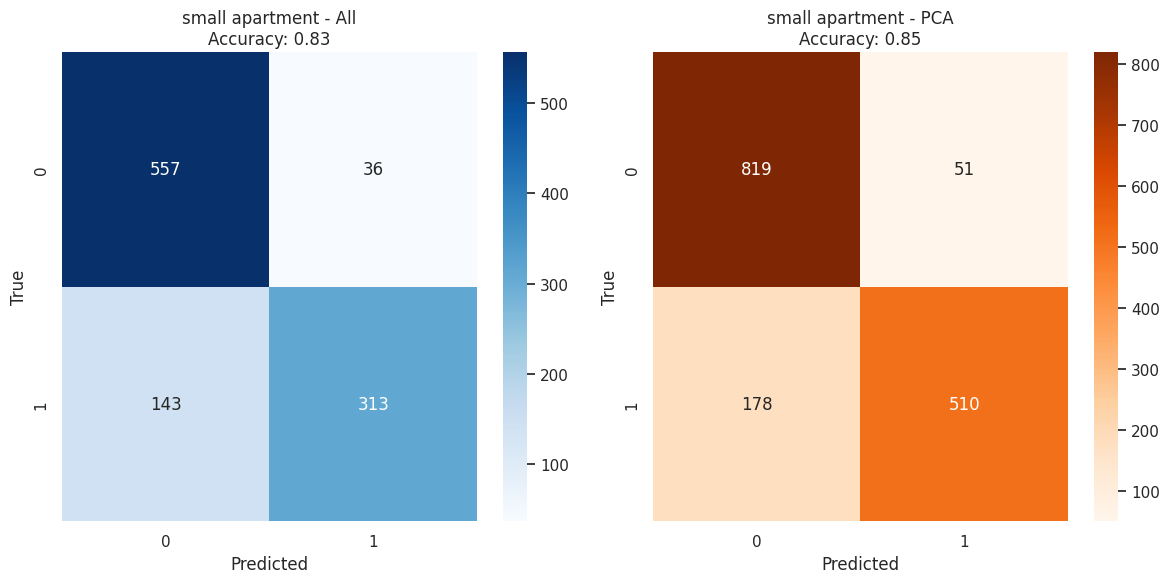

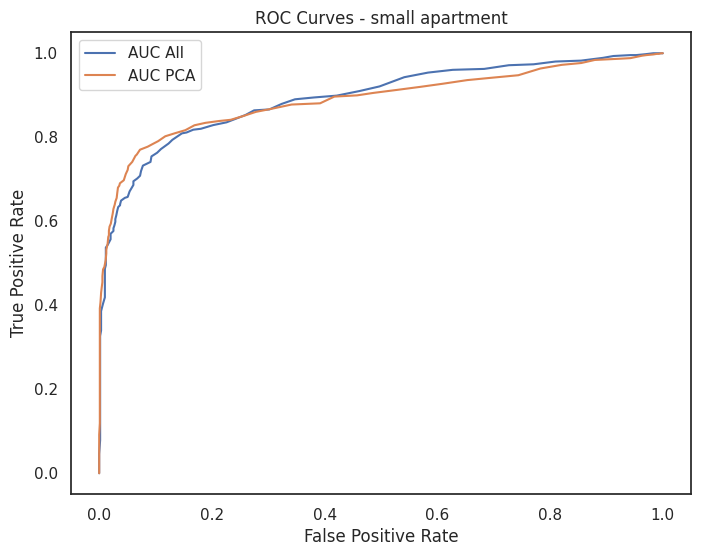

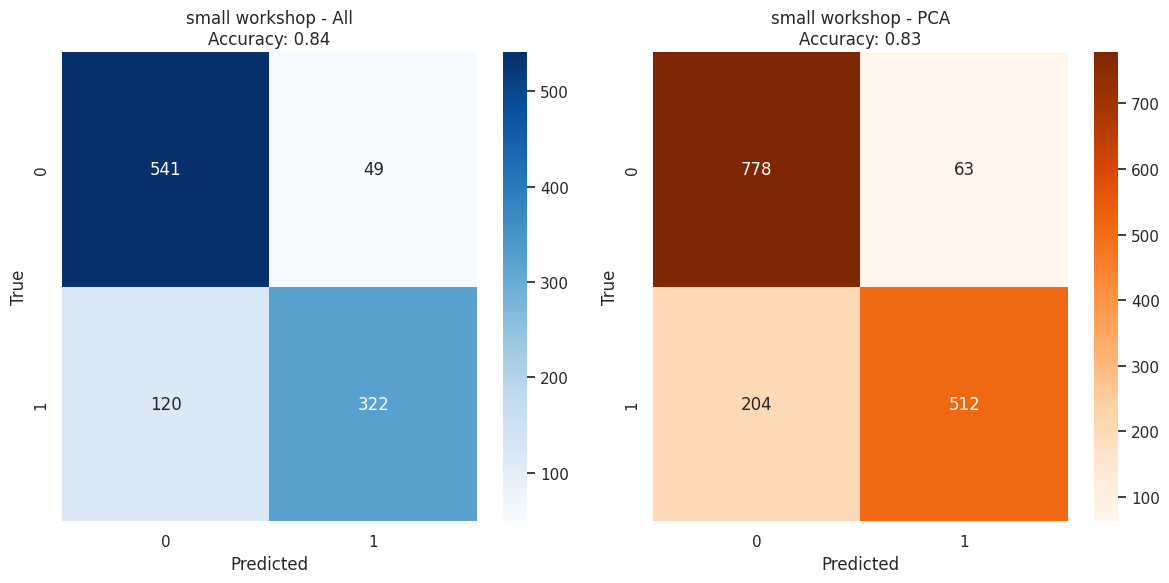

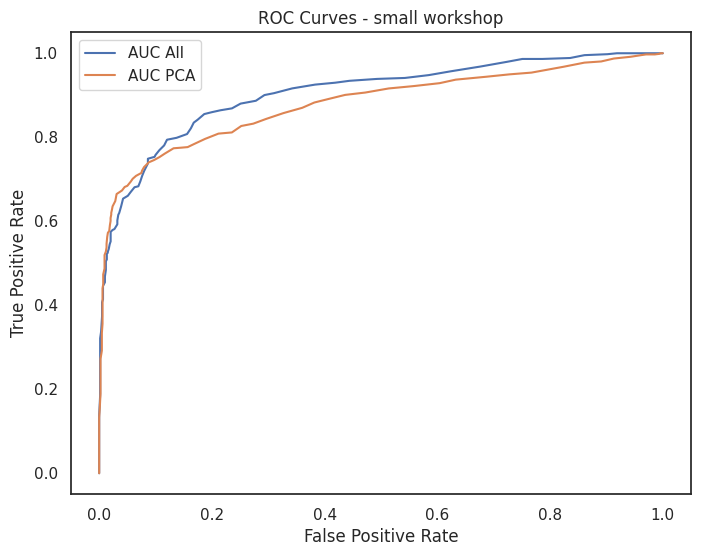

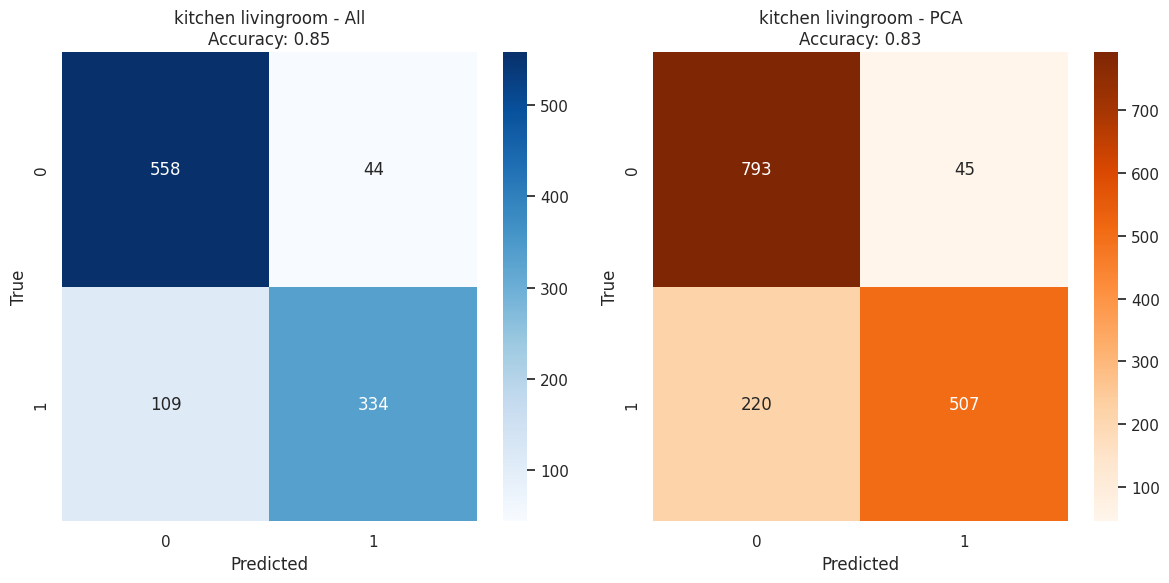

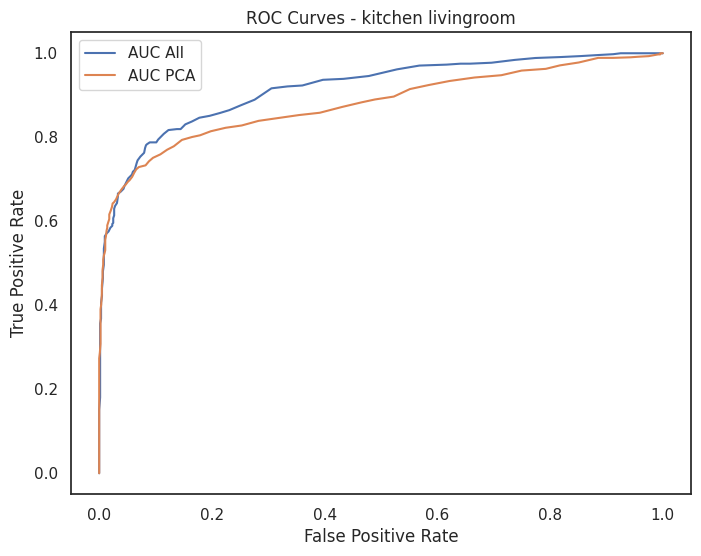

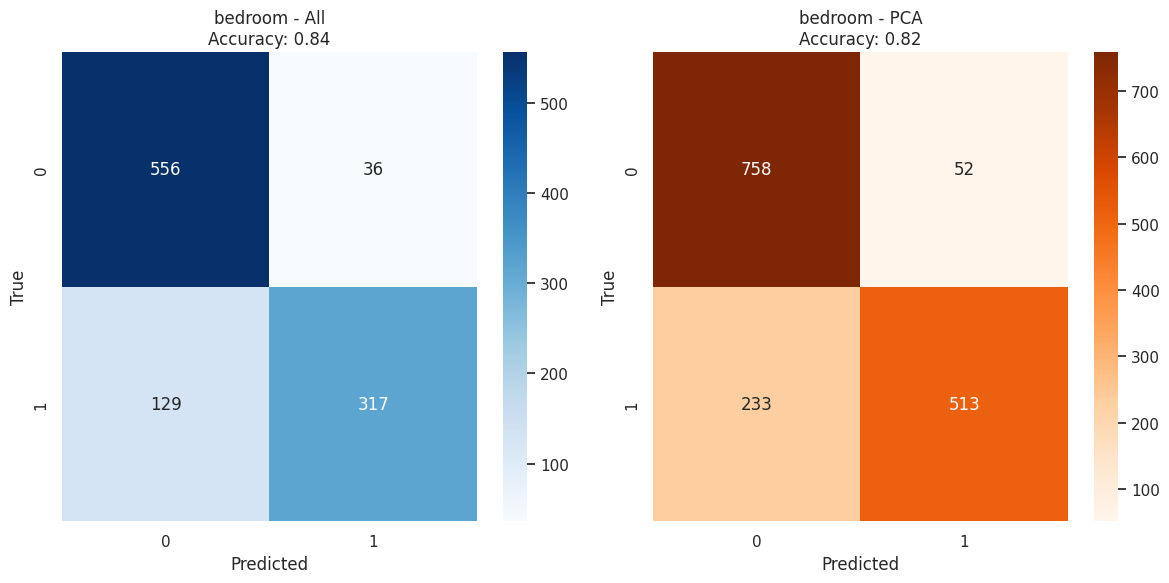

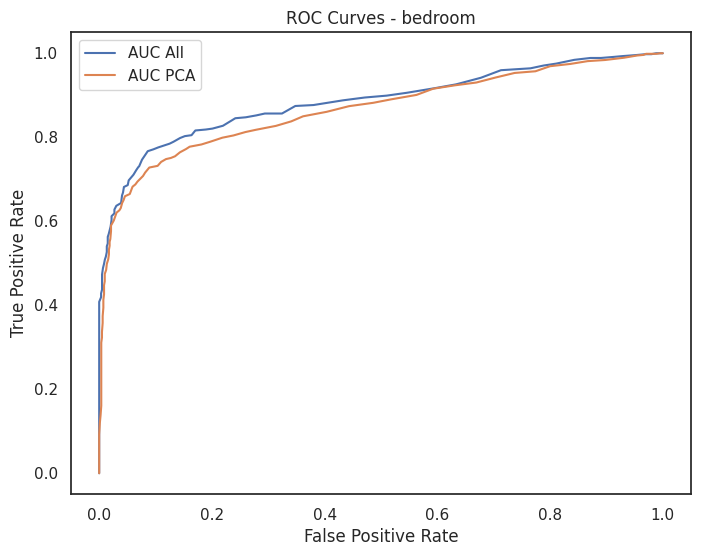

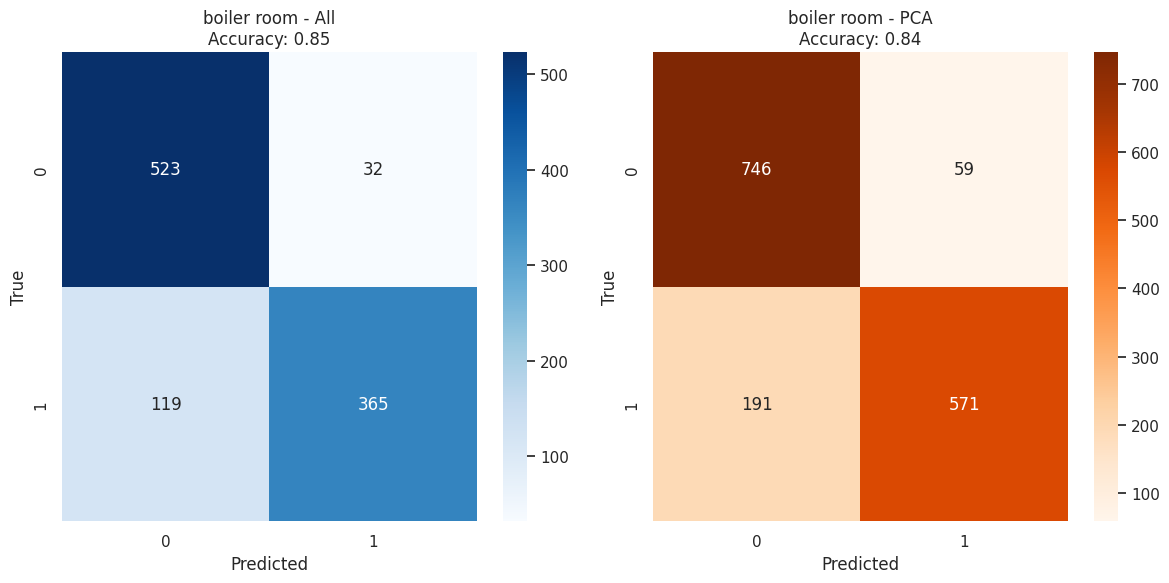

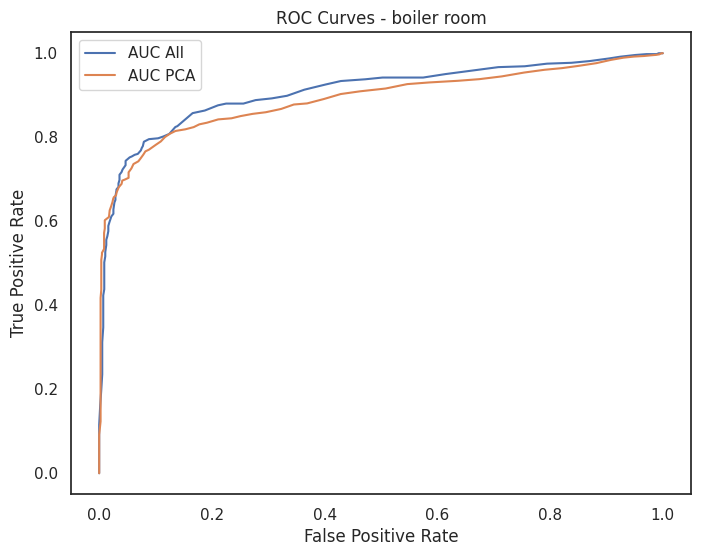

In [34]:
# Loop through each data frame in the Environment list
for data_frame in Environment:
    # Filter results_list to get results for 'All' and 'PCA' types for the current data frame
    all_results = [result for result in results_list if result['location'] == data_frame and result['type'] == 'All']
    pca_results = [result for result in results_list if result['location'] == data_frame and result['type'] == 'PCA']
    
    # Extract accuracy and confusion matrix for 'All' and 'PCA' types
    accuracy_all = all_results[0]['accuracy']
    conf_matrix_all = all_results[0]['confusion_matrix']
    accuracy_pca = pca_results[0]['accuracy']
    conf_matrix_pca = pca_results[0]['confusion_matrix']

    # Plot confusion matrices for 'All' and 'PCA' types
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix_all, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{data_frame} - All\nAccuracy: {accuracy_all:.2f}')
    plt.subplot(1, 2, 2)
    sns.heatmap(conf_matrix_pca, annot=True, cmap='Oranges', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{data_frame} - PCA\nAccuracy: {accuracy_pca:.2f}')
    plt.tight_layout()
    plt.show()

    # Extract false positive rate (FPR) and true positive rate (TPR) for 'All' and 'PCA' types
    fpr_all = all_results[0]['fpr']
    tpr_all = all_results[0]['tpr']
    fpr_pca = pca_results[0]['fpr']
    tpr_pca = pca_results[0]['tpr']
    # Plot ROC curves for 'All' and 'PCA' types
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_all, tpr_all, label='AUC All')
    plt.plot(fpr_pca, tpr_pca, label='AUC PCA')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves - {data_frame}')
    plt.legend()
    plt.show()

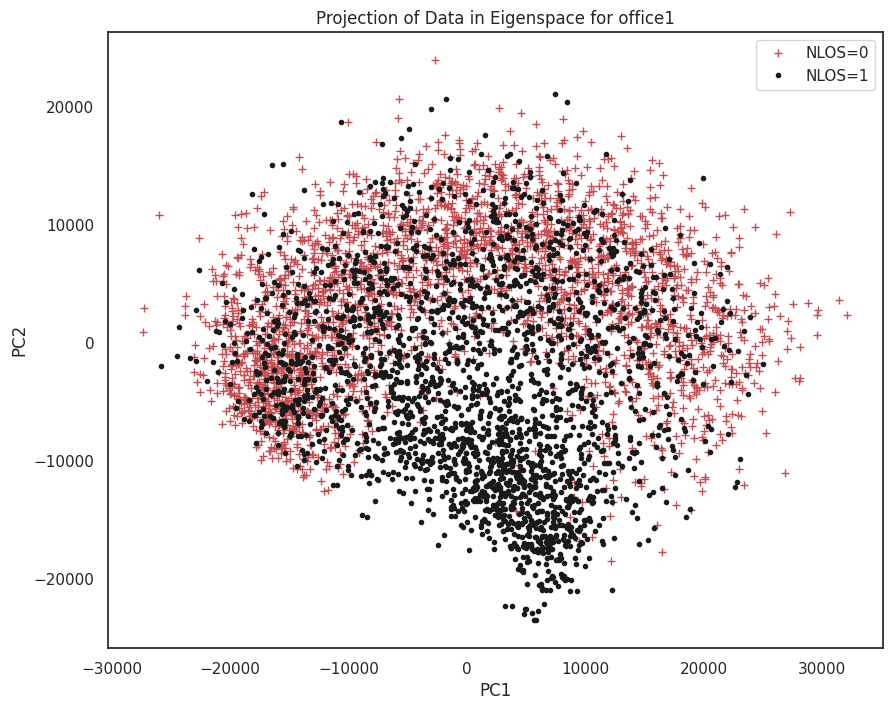

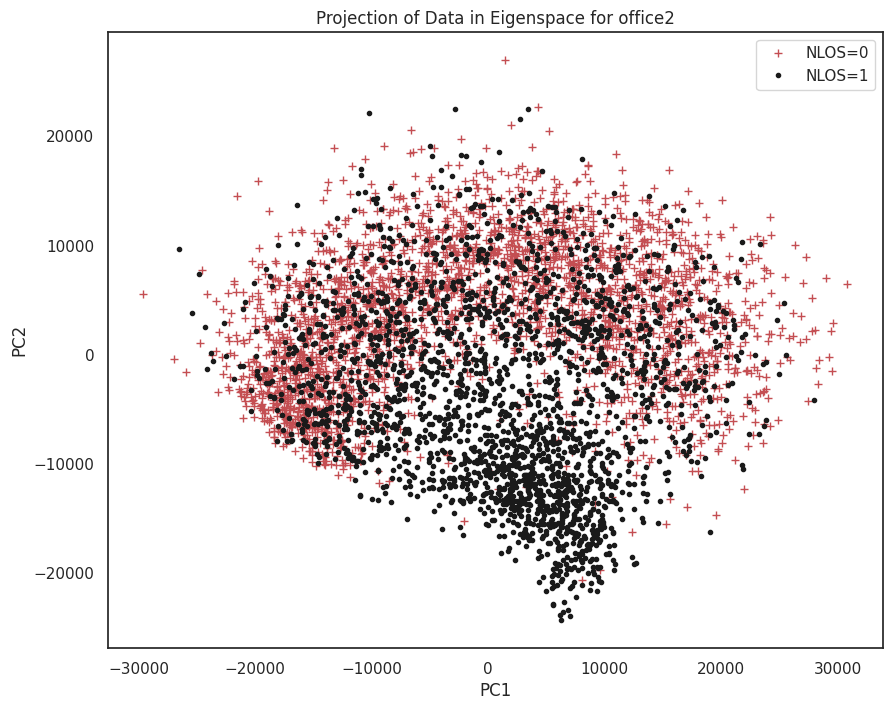

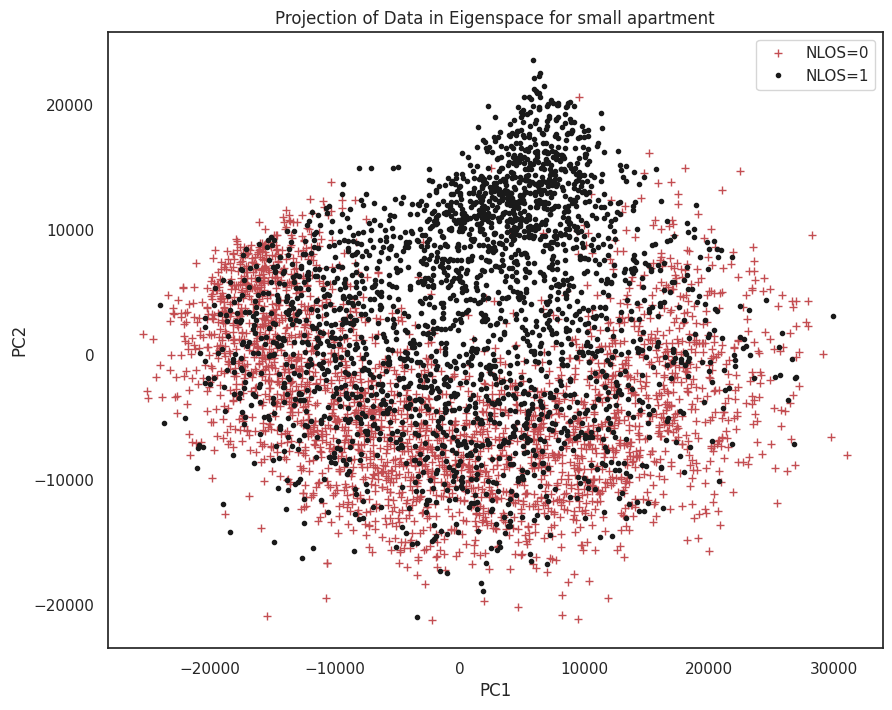

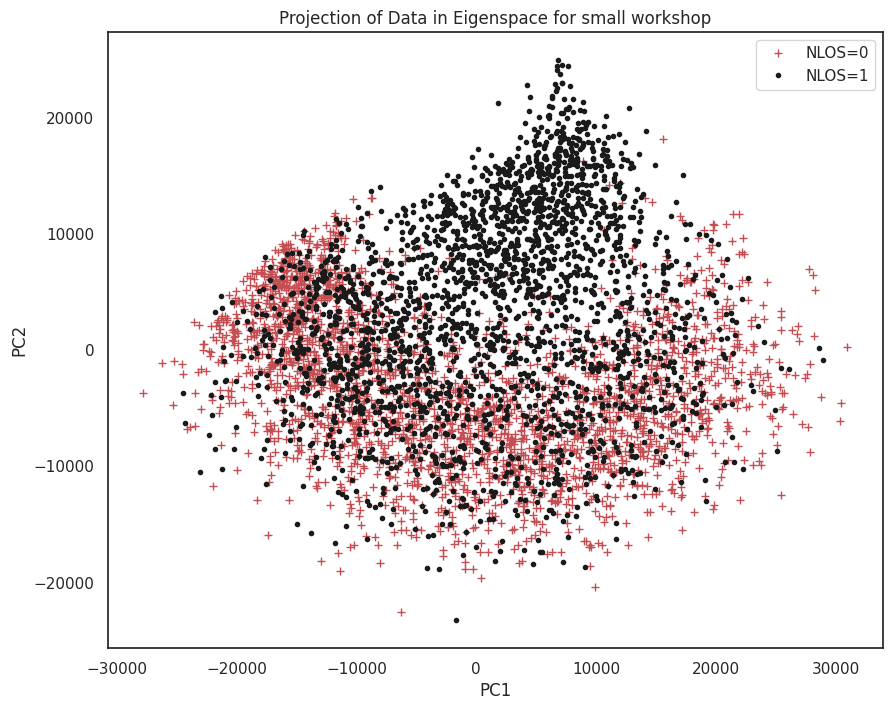

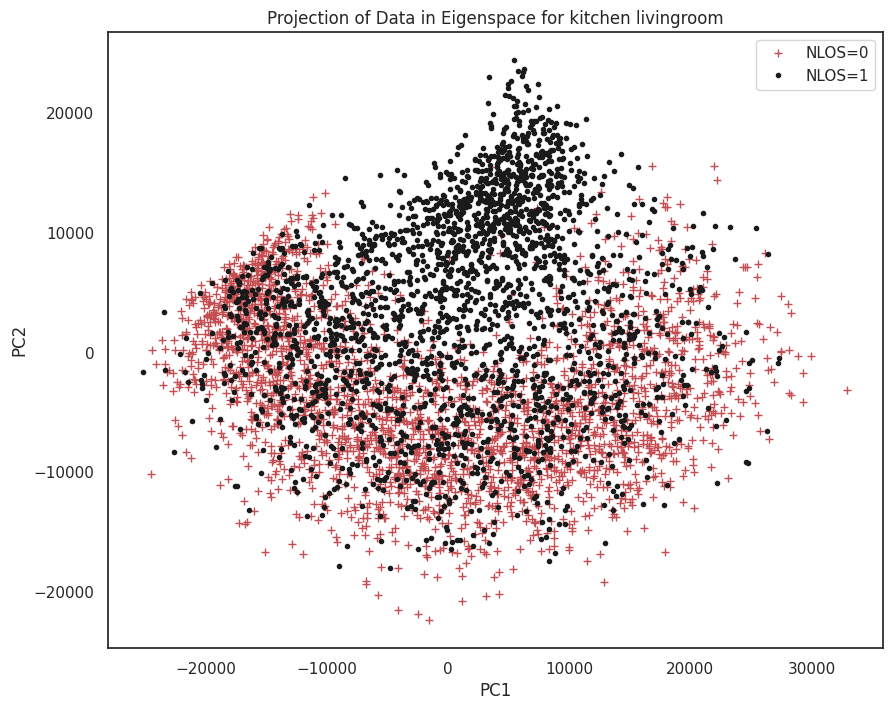

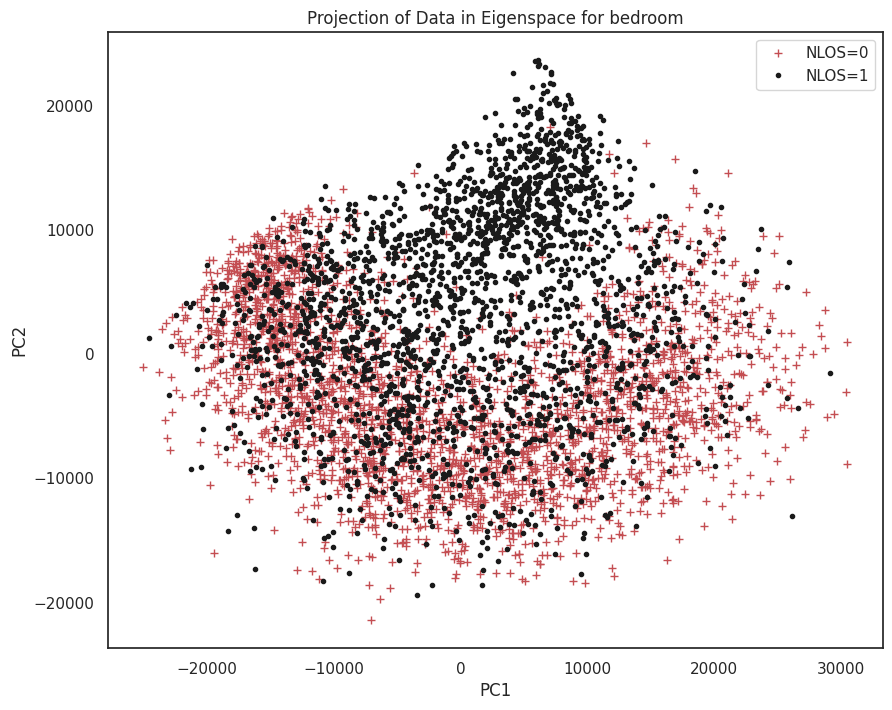

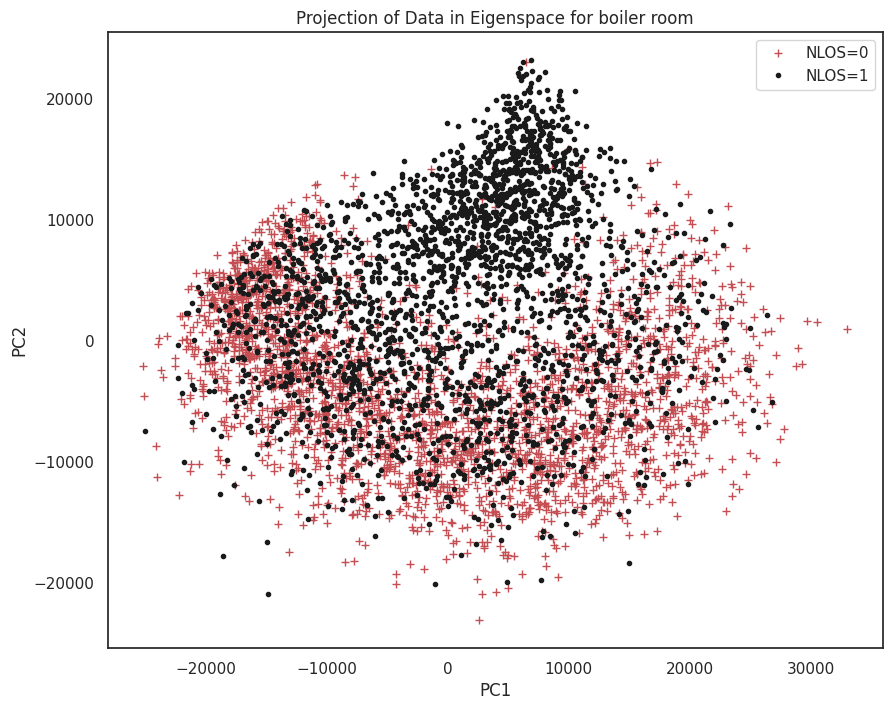

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Loop through cleaned dataframes and plot the projection of data in the eigenspace
for df_name, pcadf in cleaned_environment_List2.items():
    # Separate features (X) and target variable (y)
    X_pca = pcadf.drop('NLOS', axis=1)
    y_pca = pcadf['NLOS']
    
    # Perform PCA to reduce dimensionality to 2 components
    pca = PCA(n_components=2)
    X_pca_2 = pca.fit_transform(X_pca)
    
    # Plot Projection of Data in Eigenspace
    plt.figure(figsize=(10, 8))
    # Plot data points where NLOS=0 in red '+' symbol
    plt.plot(X_pca_2[y_pca == 0, 0], X_pca_2[y_pca == 0, 1], 'r+', label='NLOS=0')
    # Plot data points where NLOS=1 in black '.' symbol
    plt.plot(X_pca_2[y_pca == 1, 0], X_pca_2[y_pca == 1, 1], 'k.', label='NLOS=1')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Projection of Data in Eigenspace for {df_name}')
    plt.legend()
    plt.show()

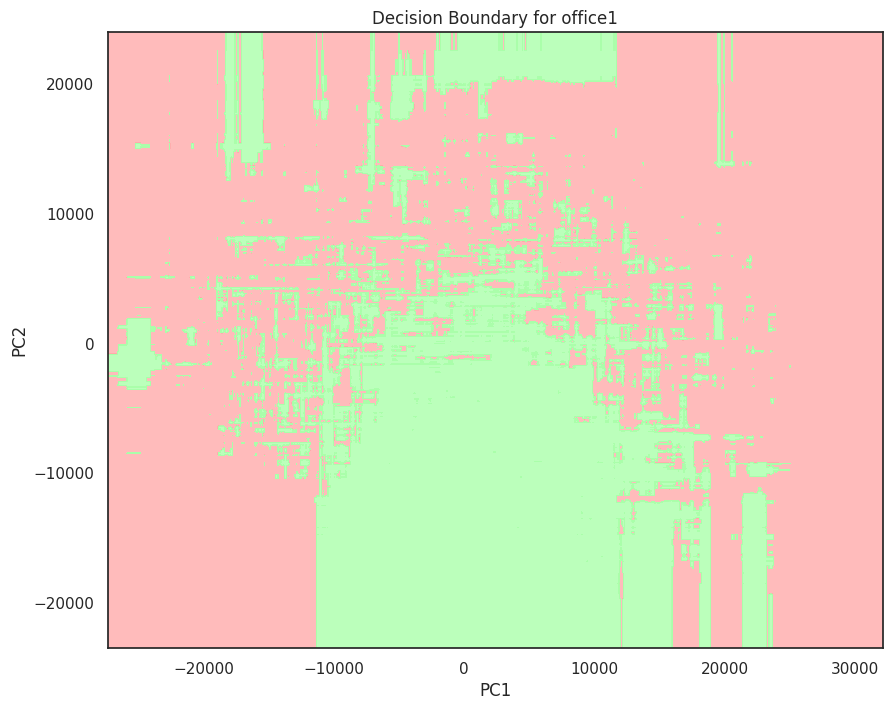

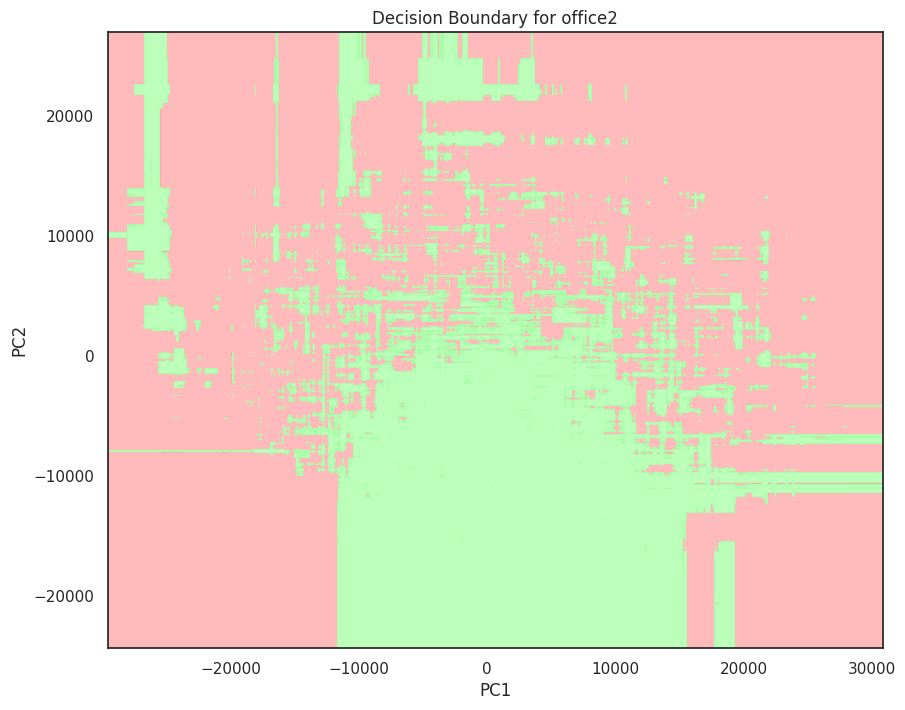

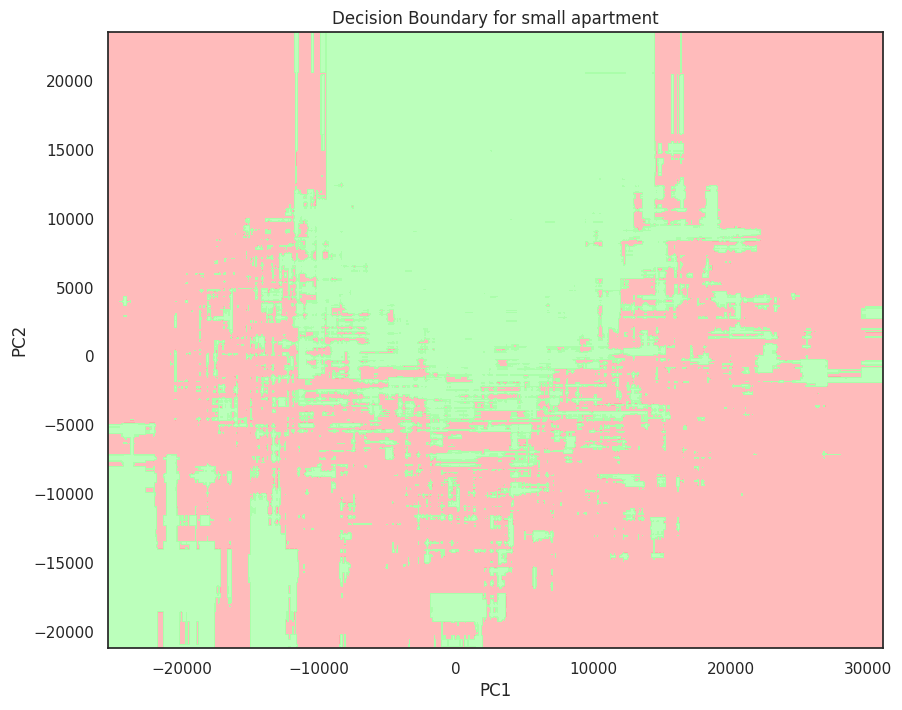

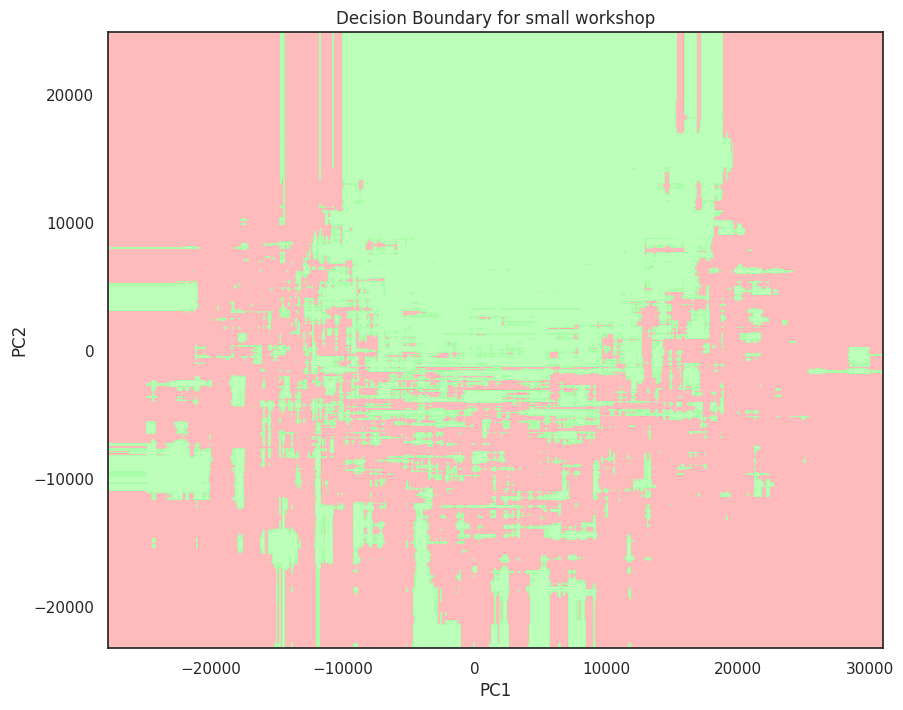

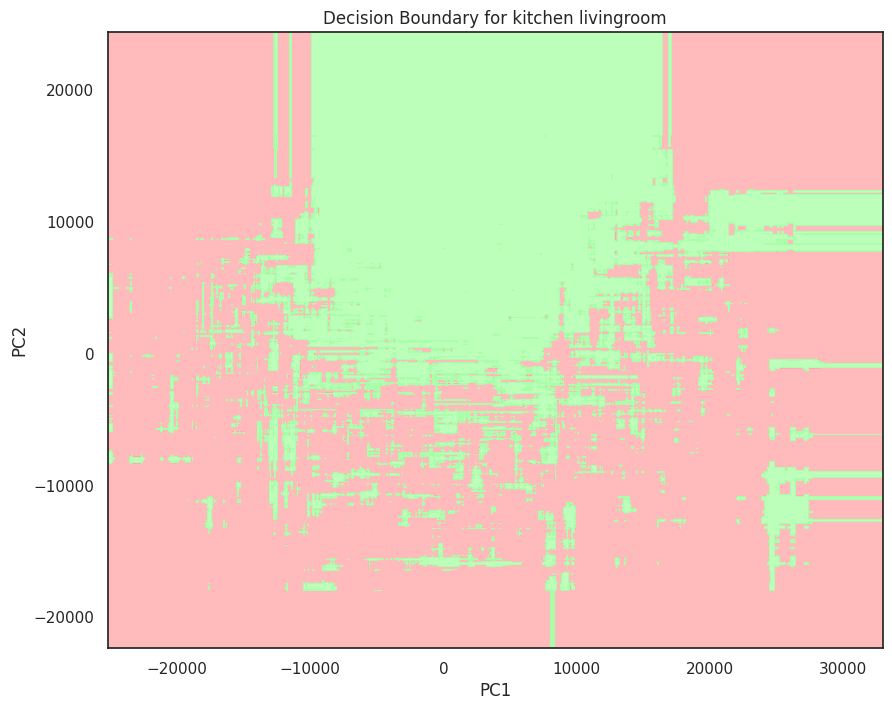

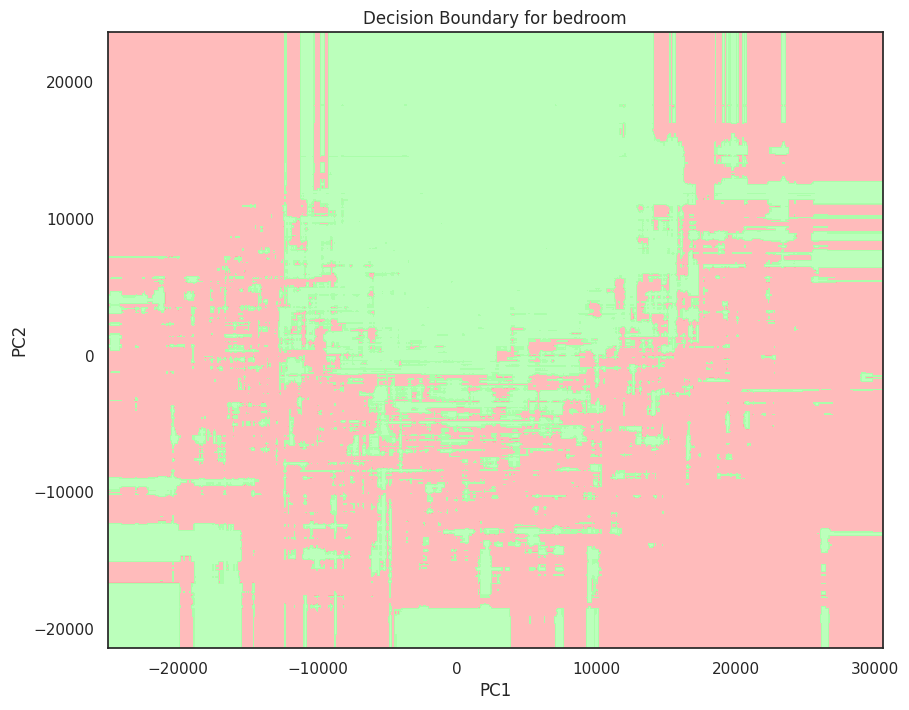

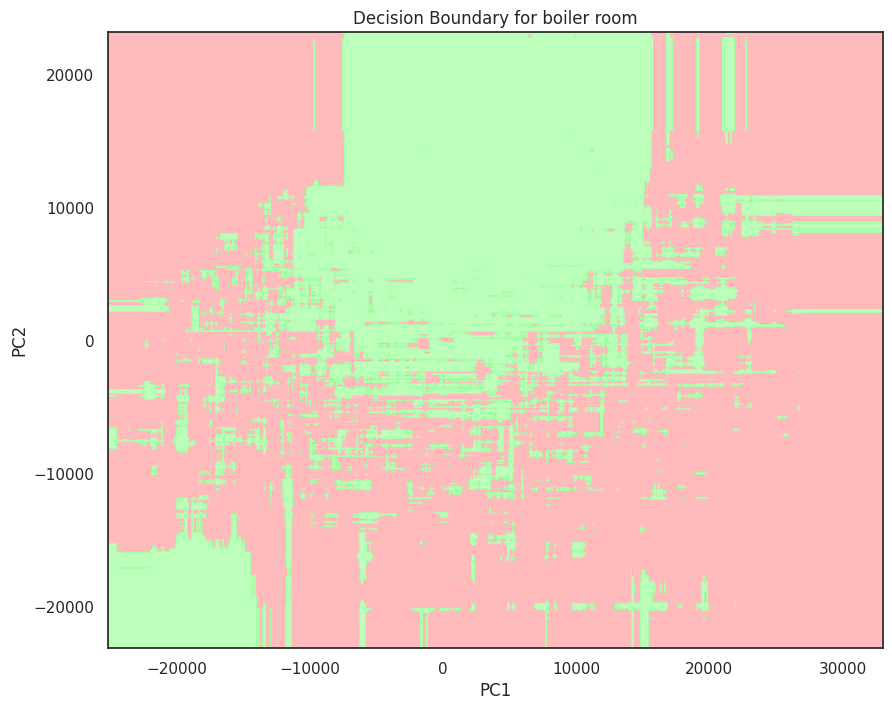

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, title):
    # Set the step size for mesh grid visualization, using 10 due to RAM limitation
    h = 10
    # Define light color map for decision regions
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    # Define bold color map for data points
    # cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Get the minimum and maximum values for the x and y axes
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Generate mesh grid points for visualization
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the class labels for each point in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    # Plot the data points
    # plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# Loop through cleaned dataframes and create decision boundary plots
for df_name, pcadf in cleaned_environment_List2.items():
    # Separate features (X) and target variable (y)
    X_pca = pcadf.drop('NLOS', axis=1)
    y_pca = pcadf['NLOS']
    
    # Perform PCA to reduce dimensionality
    pca = PCA(n_components=2)
    X_pca_2 = pca.fit_transform(X_pca)
    
    # Initialize and train a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(X_pca_2, y_pca)
    
    # Plot the decision boundary for the current dataframe
    plot_decision_boundary(X_pca_2, y_pca, rf_classifier, f'Decision Boundary for {df_name}')
